In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict

# Garbage Collector to free up memory
import gc                         
gc.enable() 

# Data Cleaning, Preparation, and Preprocessing 

In [2]:
orders = pd.read_csv( 'orders.csv' )
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv( 'products.csv' )
aisles = pd.read_csv( 'aisles.csv' )
departments = pd.read_csv( 'departments.csv' )

In [3]:
order_products_train.shape

(1384617, 4)

In [4]:
order_products_prior.shape

(32434489, 4)

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Remove Nulls

In [10]:
print(orders.isna().sum())
orders['days_since_prior_order'].fillna(int(orders['days_since_prior_order'].mean()), inplace=True)
print(orders.isna().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [11]:
print("order_products_prior")
print(order_products_prior.isna().sum())

print("\norder_products_train")
print(order_products_train.isna().sum())

print("\nproducts")
print(products.isna().sum())

print("\naisles")
print(aisles.isna().sum())
      
print("\ndepartments")
print(departments.isna().sum())

order_products_prior
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

order_products_train
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

products
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

aisles
aisle_id    0
aisle       0
dtype: int64

departments
department_id    0
department       0
dtype: int64


### Check for duplicates

In [12]:
duplicates=departments.duplicated()
print("sum duplicates " , duplicates.sum())

duplicates=aisles.duplicated()
print("sum duplicates " , duplicates.sum())

duplicates=products.duplicated()
print("sum duplicates " , duplicates.sum())

duplicates=order_products_train.duplicated()
print("sum duplicates " , duplicates.sum())

duplicates=order_products_prior.duplicated()
print("sum duplicates " , duplicates.sum())

duplicates=orders.duplicated()
print("sum duplicates " , duplicates.sum())

sum duplicates  0
sum duplicates  0
sum duplicates  0
sum duplicates  0
sum duplicates  0
sum duplicates  0


# Data Visualization and EDAs 

Here we join the 2 tables: orders and order products prior to connect a customer with the orders he/she made.
**INNER JOIN**

### Join Initial Tables

In [13]:
# Join Product, Departments and Aisle Data Frame to product_all data frame 
product_aisle  = products.merge(aisles, left_on="aisle_id", right_on="aisle_id")
product_all = product_aisle.merge(departments, left_on="department_id", right_on="department_id")
product_all = product_all.drop(columns=["aisle_id","department_id"])
product_all = product_all[['product_id', 'product_name', 'department','aisle' ]]
product_all.head()

,product_id,product_name,department,aisle
0,1,Chocolate Sandwich Cookies,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,snacks,cookies cakes
2,102,Danish Butter Cookies,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,snacks,cookies cakes


In [14]:
df3 = order_products_prior.merge(order_products_train, how="outer")
df3.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
# Join Order_Products with product_all
order_products = df3.merge(product_all,left_on="product_id", right_on="product_id",how="outer", suffixes=('', '_y'))
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,2.0,33120,1.0,1.0,Organic Egg Whites,dairy eggs,eggs
1,26.0,33120,5.0,0.0,Organic Egg Whites,dairy eggs,eggs
2,120.0,33120,13.0,0.0,Organic Egg Whites,dairy eggs,eggs
3,327.0,33120,5.0,1.0,Organic Egg Whites,dairy eggs,eggs
4,390.0,33120,28.0,1.0,Organic Egg Whites,dairy eggs,eggs


In [16]:
print(order_products.isna().sum())
df1 = order_products[order_products.isna().any(axis=1)]

order_id             3
product_id           0
add_to_cart_order    3
reordered            3
product_name         0
department           0
aisle                0
dtype: int64


In [17]:
# There are 3 products that were never ordered so they were dropped from the order_products dataframe
print(order_products.shape)
order_products = order_products.dropna()
print(order_products.shape)

(33819109, 7)
(33819106, 7)


In [18]:
market_basket = order_products.merge(orders, left_on="order_id",right_on="order_id", suffixes=('', '_y'))
market_basket.sample(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10325330,1839900.0,25824,10.0,0.0,Pita Chips Simply Naked,snacks,chips pretzels,127300,prior,2,0,15,9.0
6064899,2659270.0,11688,7.0,1.0,Lemon Fruit & Nut Food Bar,snacks,energy granola bars,47195,prior,7,1,9,7.0
29110858,2377779.0,37158,3.0,0.0,Chicken & Maple Breakfast Sausage,frozen,frozen breakfast,174409,prior,1,2,15,11.0
20129002,2879221.0,5343,6.0,1.0,Cashews Roasted Sprinkling Of Salt,snacks,nuts seeds dried fruit,93230,prior,58,3,22,7.0
28802266,3012670.0,10374,6.0,1.0,Flip Peanut Butter Dream Greek Yogurt,dairy eggs,yogurt,144129,prior,21,0,11,28.0


In [19]:
market_basket = market_basket[['user_id','order_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order','product_name', 'add_to_cart_order', 'reordered',
    'department', 'aisle' ]]

market_basket.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,add_to_cart_order,reordered,department,aisle
0,202279,2.0,3,5,9,8.0,Organic Egg Whites,1.0,1.0,dairy eggs,eggs
1,202279,2.0,3,5,9,8.0,Michigan Organic Kale,2.0,1.0,produce,fresh vegetables
2,202279,2.0,3,5,9,8.0,Garlic Powder,3.0,0.0,pantry,spices seasonings
3,202279,2.0,3,5,9,8.0,Coconut Butter,4.0,1.0,pantry,oils vinegars
4,202279,2.0,3,5,9,8.0,Natural Sweetener,5.0,0.0,pantry,baking ingredients


In [20]:
print(market_basket.isna().sum())

user_id                   0
order_id                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
add_to_cart_order         0
reordered                 0
department                0
aisle                     0
dtype: int64


In order to understand the data to be able to extract useful features from it, we need some data visualizations 

In [21]:
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Monday" if x==1 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Friday" if x==5 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

#### Frequency of Order Based on Days

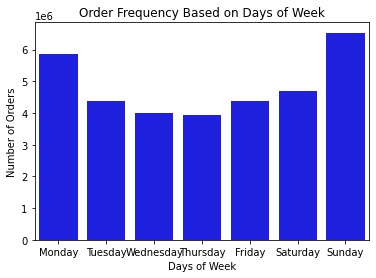

In [22]:
plt.figure(),
ax = sns.countplot(x="order_dow",data=market_basket,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], color='blue')
plt.title("Order Frequency Based on Days of Week")
plt.xlabel("Days of Week")
plt.ylabel("Number of Orders")
plt.show()

#### Frequency or Order Based on Hours

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


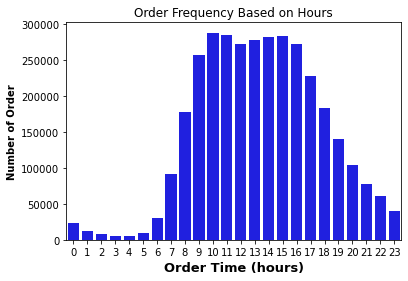

In [23]:
plt.figure()
order_hours = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
order_hours = order_hours.order_hour_of_day.value_counts()
sns.barplot(order_hours.index, order_hours.values, color='blue')
plt.title("Order Frequency Based on Hours")
plt.ylabel("Number of Order",weight= "bold")
plt.xlabel('Order Time (hours)', fontsize=13, weight="bold")
plt.show()

#### Heatmap of Frequency of Order Based on Days & Hours

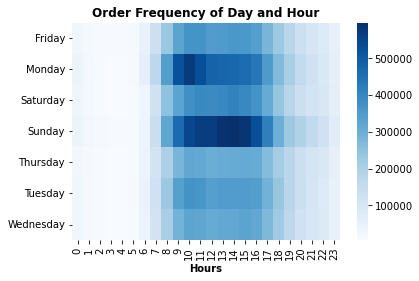

In [24]:
grouped_df = market_basket.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure()
sns.heatmap(grouped_df,cmap="Blues")
plt.title("Order Frequency of Day and Hour",weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.show()

#### Reorder Ratio mean based on order day of week and hour of day

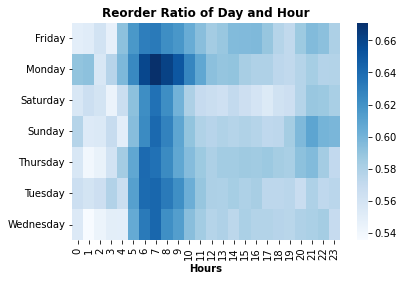

In [25]:
heatmap_reorder = market_basket.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
heatmap_reorder = heatmap_reorder.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure()
sns.heatmap(heatmap_reorder,cmap="Blues")
plt.title("Reorder Ratio of Day and Hour", weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.show()

#### Most Sold Products (Top 10)

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


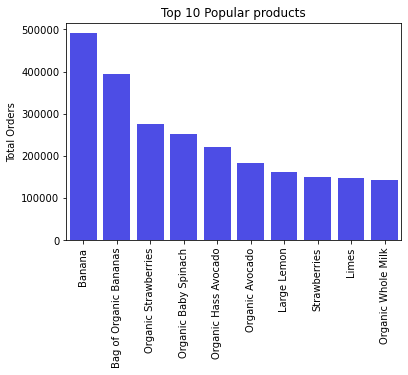

In [26]:
most_sold_products = market_basket['product_name'].value_counts().head(10)
sns.barplot(most_sold_products.index, most_sold_products.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular products")
plt.xlabel("")
plt.ylabel("Total Orders")
plt.show()

#### Most Reordered Products (Top 10)

<AxesSubplot:title={'center':'Top 10 often reordered products'}, xlabel='product_name'>

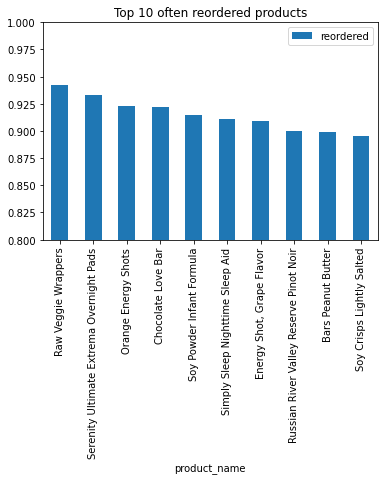

In [27]:
most_often_reordered = order_products.groupby("product_id")["reordered"].aggregate("mean").reset_index()
most_often_reordered = most_often_reordered.merge(products, on='product_id', how='left')
most_often_reordered = most_often_reordered.sort_values(by="reordered",ascending=False,kind="mergesort")[0:10]
most_often_reordered.plot(x="product_name", y=["reordered"], kind="bar", ylim=(0.8,1), title = "Top 10 often reordered products")

#### Most Popular Aisle (Top 10)

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


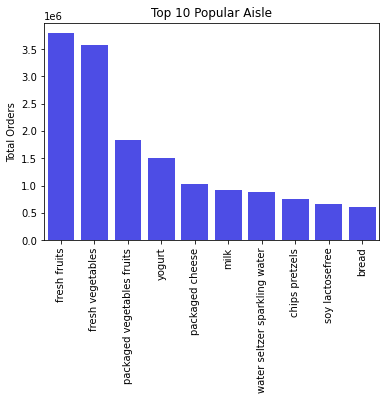

In [28]:
plt.figure(),
popular_aisle = market_basket['aisle'].value_counts().head(10)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle")
plt.xlabel("")
plt.ylabel("Total Orders")
plt.show()

#### Most Popular Departments (Top 10)

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


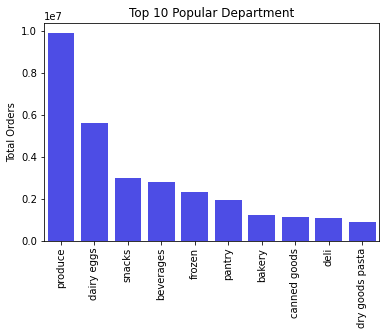

In [29]:
plt.figure(),
popular_department = market_basket['department'].value_counts().head(10)
sns.barplot(popular_department.index, popular_department.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Department")
plt.xlabel("")
plt.ylabel("Total Orders")
plt.show()

#### Avg Cartsize of Users

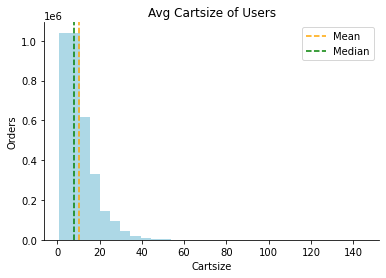

In [30]:
plt.figure()
usr_cartsize = market_basket.groupby('user_id')['order_id'].value_counts()
plt.hist(market_basket.groupby('user_id')['order_id'].value_counts(), bins=30, color='lightblue')
plt.axvline(usr_cartsize.mean(), color='orange',linestyle='--', label='Mean')
plt.axvline(usr_cartsize.median(),color='green', linestyle='--', label='Median')
plt.title('Avg Cartsize of Users')
plt.xlabel('Cartsize')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

#### Users Reorder Ratio Frequency

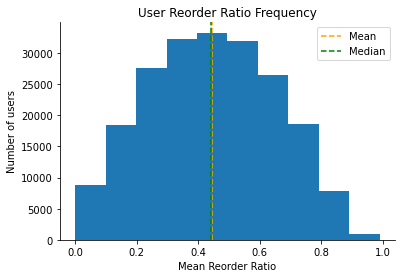

In [31]:
plt.figure()
plt.hist(market_basket.groupby('user_id')['reordered'].mean())
plt.axvline(market_basket.groupby('user_id')['reordered'].mean().mean(), color='orange',linestyle='--', label='Mean')
plt.axvline(market_basket.groupby('user_id')['reordered'].mean().median(),color='green', linestyle='--', label='Median')
plt.title('User Reorder Ratio Frequency')
plt.xlabel('Mean Reorder Ratio')
plt.ylabel('Number of users')
plt.legend()
sns.despine()
plt.show();

#### Product Reorder Ratio Frequency

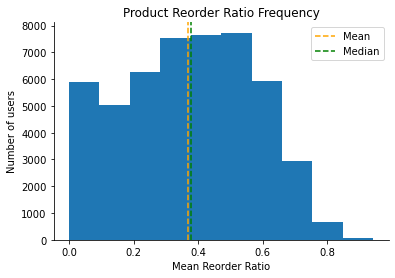

In [32]:
plt.figure()
plt.hist(market_basket.groupby('product_name')['reordered'].mean())
plt.axvline(market_basket.groupby('product_name')['reordered'].mean().mean(), color='orange',linestyle='--', label='Mean')
plt.axvline(market_basket.groupby('product_name')['reordered'].mean().median(),color='green', linestyle='--', label='Median')
plt.title('Product Reorder Ratio Frequency')
plt.xlabel('Mean Reorder Ratio')
plt.ylabel('Number of users')
plt.legend()
sns.despine()
plt.show();

''' From the last 2 graphs, we saw we can add the features **u_reordered_ratio** and **p_reordered_ratio**'''

#### How often do people order the same items again?

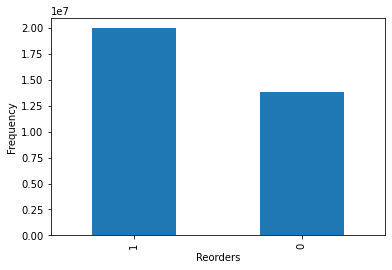

In [33]:
fig, ax = plt.subplots()
df3["reordered"].value_counts().plot(ax=ax, kind='bar', xlabel='Reorders', ylabel='Frequency')
plt.show()

#### Association between time of last order and probability of making an order

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


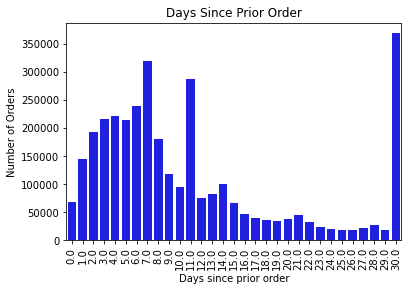

In [34]:
plt.figure()
order_days_since_prior_order = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
order_days_since_prior_order = order_days_since_prior_order.days_since_prior_order.value_counts()
sns.barplot(order_days_since_prior_order.index, order_days_since_prior_order.values, color = "blue")
plt.xticks(rotation='vertical')
plt.title("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.xlabel('Days since prior order')
plt.show()

#### Association between time of last order and probability of reorder

<AxesSubplot:title={'center':'Association between time of last order and probability of reorder'}, xlabel='days_since_prior_order', ylabel='reorder ratio'>

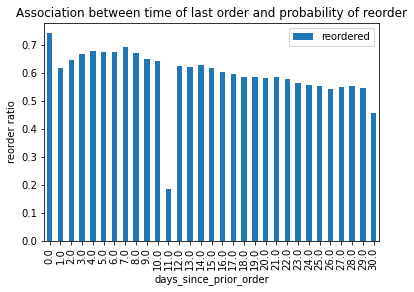

In [35]:
last_order_time_reorder = order_products.merge(orders, on='order_id', how='left')
last_order_time_reorder = last_order_time_reorder.groupby("days_since_prior_order")["reordered"].aggregate("mean").reset_index()
last_order_time_reorder.plot(x="days_since_prior_order", y="reordered", kind="bar",title = "Association between time of last order and probability of reorder", ylabel = "reorder ratio")

#### Association between product number of orders and probability of its reorder

<AxesSubplot:xlabel='Number of reorders per product', ylabel='Avg reorder ratio per product'>

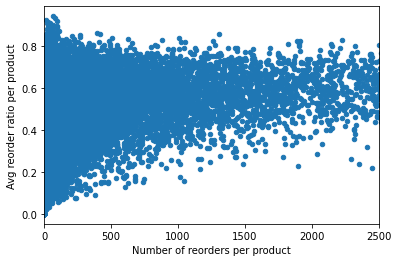

In [36]:
num_orders_reorder = order_products.groupby("product_id")["reordered"].aggregate(["mean","sum"]).reset_index()
num_orders_reorder.plot.scatter(x="sum", y="mean", xlim=(0,2500), xlabel = "Number of reorders per product", ylabel="Avg reorder ratio per product")

#### Number of prior orders per user

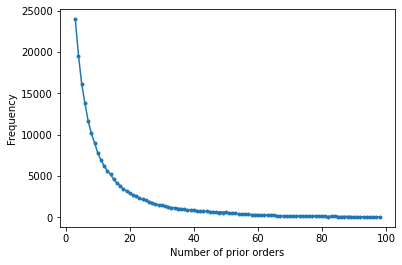

In [37]:
orders_prior = orders[orders.eval_set == "prior"]
num_orders_prior = orders_prior.groupby('user_id')['order_number'].max().to_frame('prior_orders_for_user')
num_orders_prior = num_orders_prior[num_orders_prior['prior_orders_for_user']<99]
fig, ax = plt.subplots()
num_orders_prior["prior_orders_for_user"].value_counts().plot(style='.-', xlabel='Number of prior orders', ylabel='Frequency')
plt.show()

### Correlation Matrix

<AxesSubplot:>

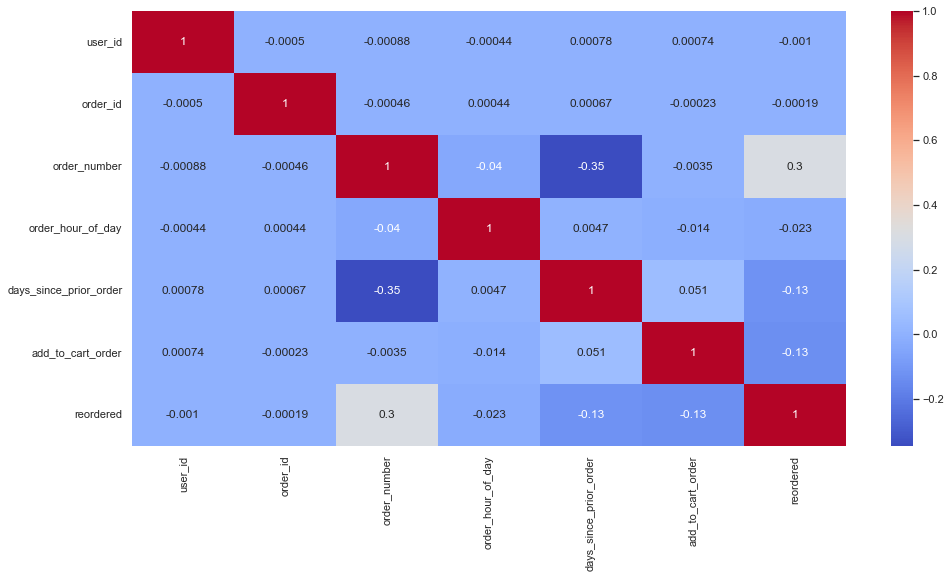

In [38]:
import seaborn as sns
correlationMatrix = market_basket.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlationMatrix, annot = True, fmt='.2g',cmap= 'coolwarm')

''' From the correlation matrix, we see that there is a slight correlation between reordered and order_number, which made us think of adding the feature **total_orders_for_user**. Also, there is a slight correlation between reordered and days_since_prior_order and add_to_cart_order , which made us think of adding the features **user_avg_days_since_prior_order** and **adding_product_to_cart_time** (user avg add to cart order for a certain product)'''


In [39]:
del product_aisle, product_all, df3, order_products, market_basket, order_hours, grouped_df, heatmap_reorder, most_sold_products, most_often_reordered, popular_aisle, popular_department, usr_cartsize, order_days_since_prior_order, last_order_time_reorder, num_orders_reorder,num_orders_prior
gc.collect()

24223

### Adding Extra Features

In [40]:
# We extract different features from order_products_prior only leaving order_products_train for validation

In [41]:
mergedDF = orders.merge(order_products_prior, on='order_id', how='inner')
mergedDF.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,11.0,196,1,0
1,2539329,1,prior,1,2,8,11.0,14084,2,0
2,2539329,1,prior,1,2,8,11.0,12427,3,0
3,2539329,1,prior,1,2,8,11.0,26088,4,0
4,2539329,1,prior,1,2,8,11.0,26405,5,0


### user_total_puchases --> Total number of orders per customer

In [42]:
# Order no: for a certain user if the order no is 3 then this is his 3rd order from instacart then getting the maximum of 
# that attribute will tell us the no of times this user had visited instacart

# user_total_puchases = mergedDF.groupby('user_id')['order_number'].max().to_frame('total_orders_for_user').reset_index()
# user_total_puchases.head()

# Using Map Reduce
user_total_puchases = pd.read_csv("maxOrderNumberPerUser.csv", header=None)
user_total_puchases.columns = ["index","user_id", "total_orders_for_user"]
user_total_puchases = user_total_puchases.drop(['index'], axis=1)
user_total_puchases.head()

,user_id,total_orders_for_user
0,71915,26
1,105350,24
2,115070,11
3,49540,36
4,180206,35


In [43]:
user_total_puchases.describe()

,user_id,total_orders_for_user
count,206209.000000,206209.000000
mean,103105.000000,15.590367
std,59527.555167,16.654774
min,1.000000,3.000000
25%,51553.000000,5.000000
50%,103105.000000,9.000000
75%,154657.000000,19.000000
max,206209.000000,99.000000


(206209,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


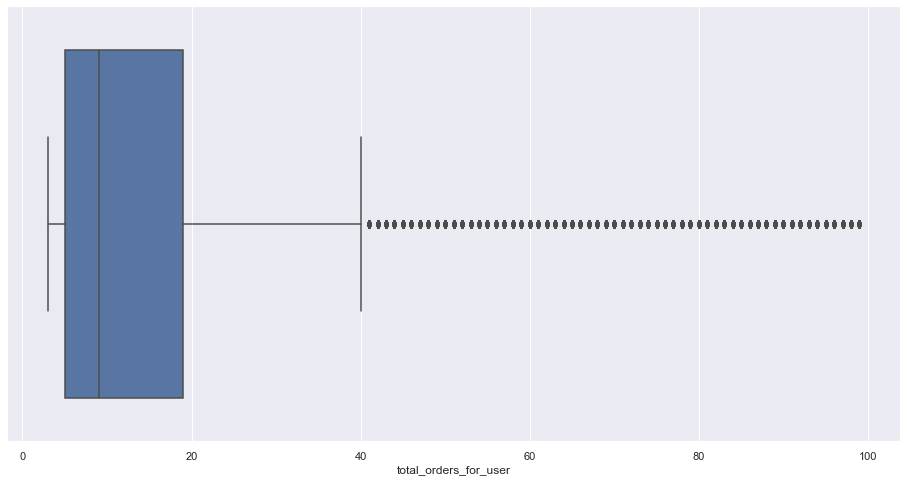

In [44]:
sns.boxplot(user_total_puchases['total_orders_for_user'])
print(user_total_puchases['total_orders_for_user'].shape)
Q1 =user_total_puchases['total_orders_for_user'].quantile(0.25)
Q3 =user_total_puchases['total_orders_for_user'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((user_total_puchases['total_orders_for_user'] >= (Q3+1.5*IQR)) | (user_total_puchases['total_orders_for_user'] <= (Q1-1.5*IQR)))
user_total_puchases.drop(user_total_puchases.index[bound[0]],inplace=True)

(188307,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


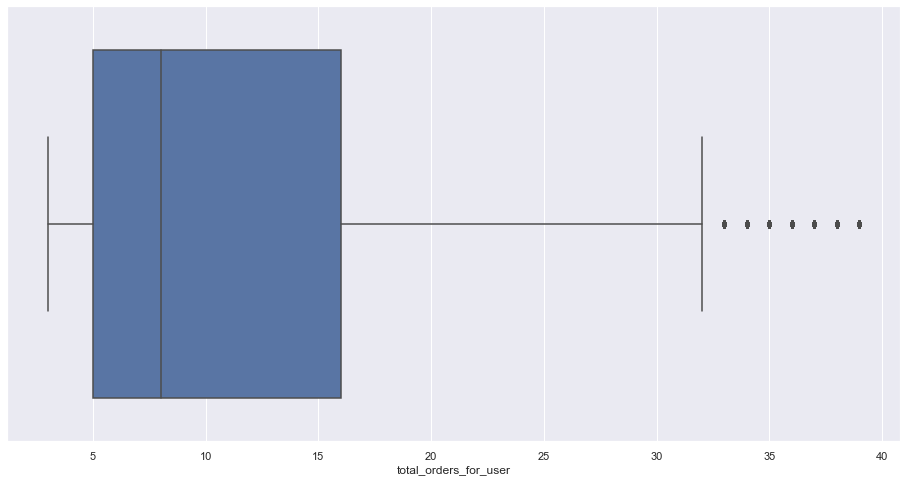

In [45]:
sns.boxplot(user_total_puchases['total_orders_for_user'])

print(user_total_puchases['total_orders_for_user'].shape)

### u_reordered_ratio --> average reorder ratio per user

In [46]:
# u_reorder = mergedDF.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
# u_reorder = u_reorder.reset_index()
# u_reorder.head()

# Using Map Reduce
u_reorder = pd.read_csv("AverageReorderPerUser.csv", header=None)
u_reorder.columns = ["index","user_id", "u_reordered_ratio"]
u_reorder = u_reorder.drop(['index'], axis=1)
u_reorder.head()

,user_id,u_reordered_ratio
0,71915,0.660256
1,105350,0.695652
2,115070,0.290698
3,49540,0.361111
4,180206,0.457227


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='u_reordered_ratio'>

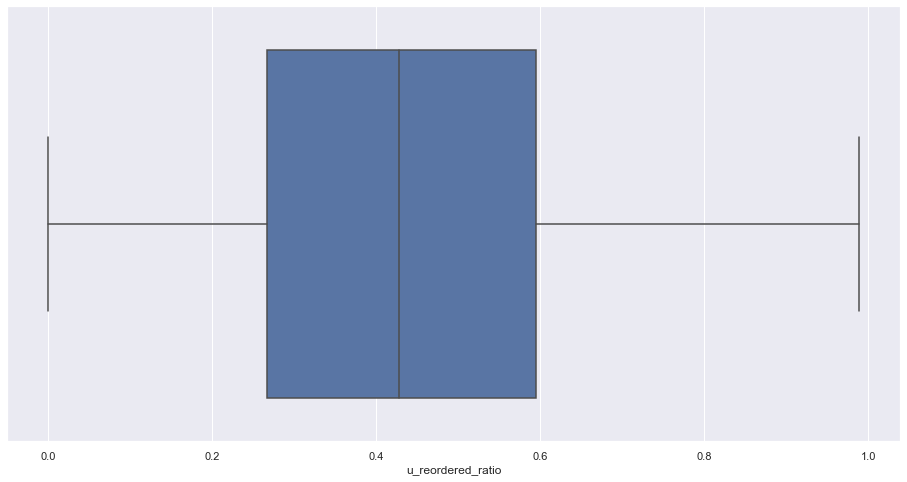

In [47]:
sns.boxplot(u_reorder['u_reordered_ratio'])

### avg_days_since_prior_order 

In [48]:
avg_days_since_prior_order = mergedDF.groupby('user_id')['days_since_prior_order'].mean().to_frame('avg_days_since_prior_order')
avg_days_since_prior_order = avg_days_since_prior_order.reset_index()
avg_days_since_prior_order.head()

,user_id,avg_days_since_prior_order
0,1,19.474576
1,2,15.635897
2,3,11.431818
3,4,14.388889
4,5,13.459459


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_days_since_prior_order'>

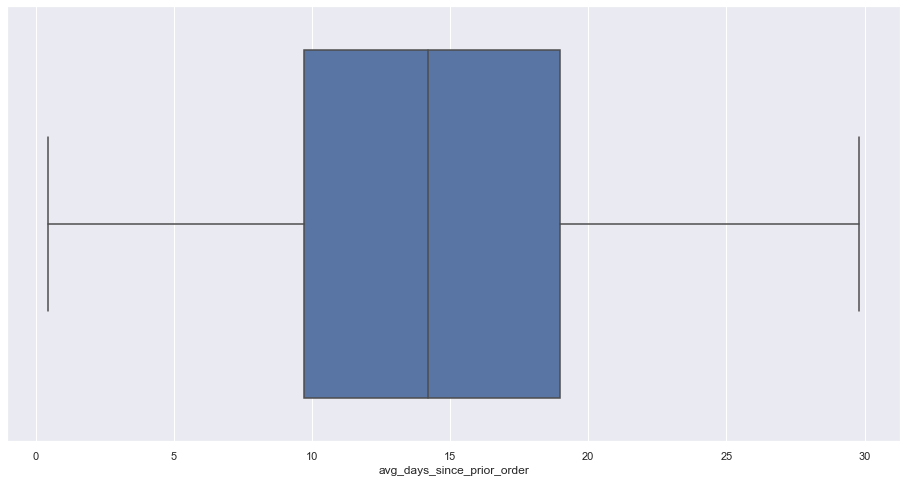

In [49]:
sns.boxplot(avg_days_since_prior_order['avg_days_since_prior_order'])

### extra_user_features: 
#### user_avg_cartsize --> Average cart size for each user 
#### user_total_products --> Total number of unique products bought by user x

In [50]:
extra_user_features = ['user_avg_cartsize','user_total_products']

df_user_features = (mergedDF.groupby(['user_id'],as_index=False).agg(OrderedDict([('order_id',(lambda x: x.shape[0] / x.nunique())),('product_id','nunique')])))
df_user_features.columns = ['user_id'] + extra_user_features
df_user_features.head()

,user_id,user_avg_cartsize,user_total_products
0,1,5.900000,18
1,2,13.928571,102
2,3,7.333333,33
3,4,3.600000,17
4,5,9.250000,23


(206209,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


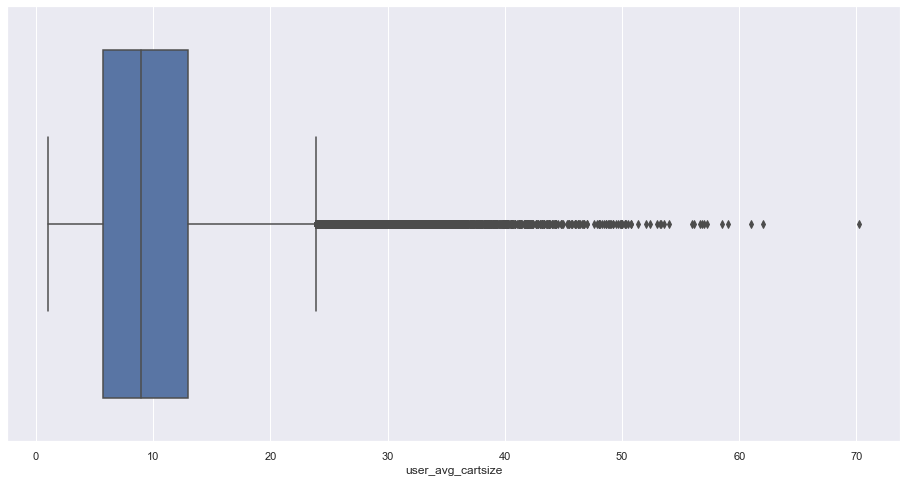

In [51]:
sns.boxplot(df_user_features['user_avg_cartsize'])
print(df_user_features['user_avg_cartsize'].shape)
Q1 =df_user_features['user_avg_cartsize'].quantile(0.25)
Q3 =df_user_features['user_avg_cartsize'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((df_user_features['user_avg_cartsize'] >= (Q3+1.5*IQR)) | (df_user_features['user_avg_cartsize'] <= (Q1-1.5*IQR)))
df_user_features.drop(df_user_features.index[bound[0]],inplace=True)

(200649,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


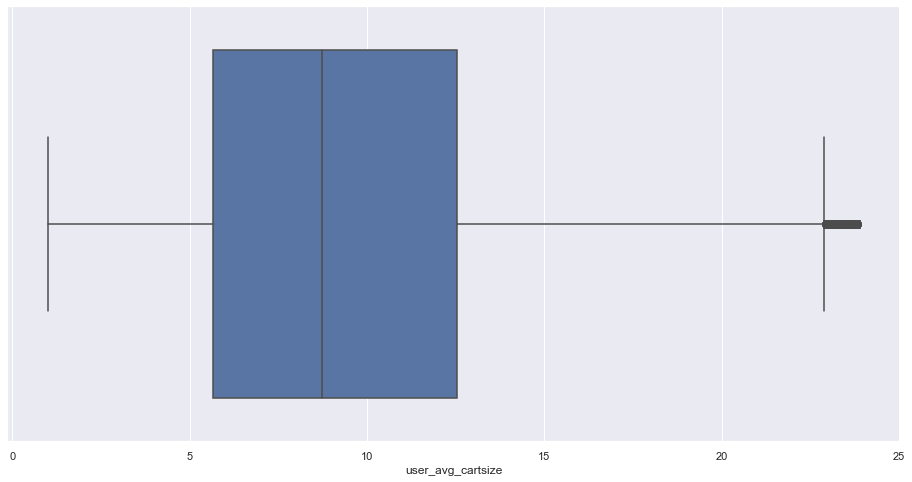

In [52]:
sns.boxplot(df_user_features['user_avg_cartsize'])
print(df_user_features['user_avg_cartsize'].shape)

(200649,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


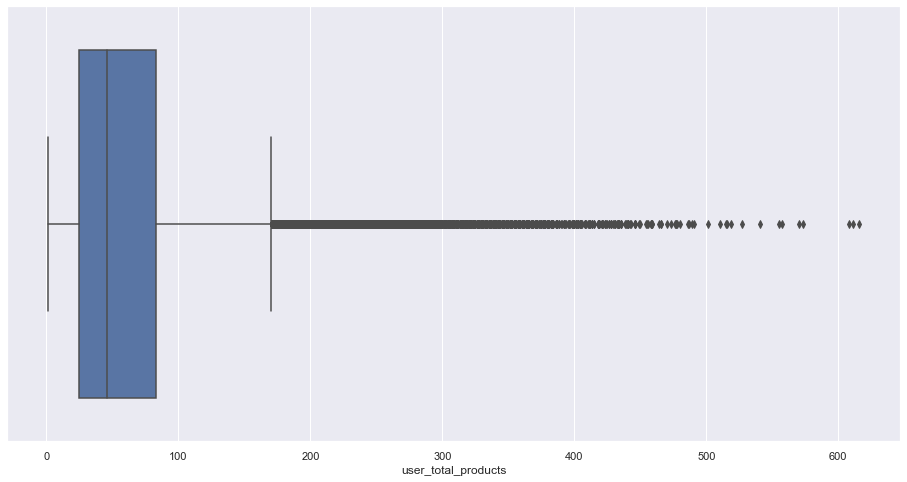

In [53]:
sns.boxplot(df_user_features['user_total_products'])
print(df_user_features['user_total_products'].shape)
Q1 =df_user_features['user_total_products'].quantile(0.25)
Q3 =df_user_features['user_total_products'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((df_user_features['user_total_products'] >= (Q3+1.5*IQR)) | (df_user_features['user_total_products'] <= (Q1-1.5*IQR)))
df_user_features.drop(df_user_features.index[bound[0]],inplace=True)

(189881,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


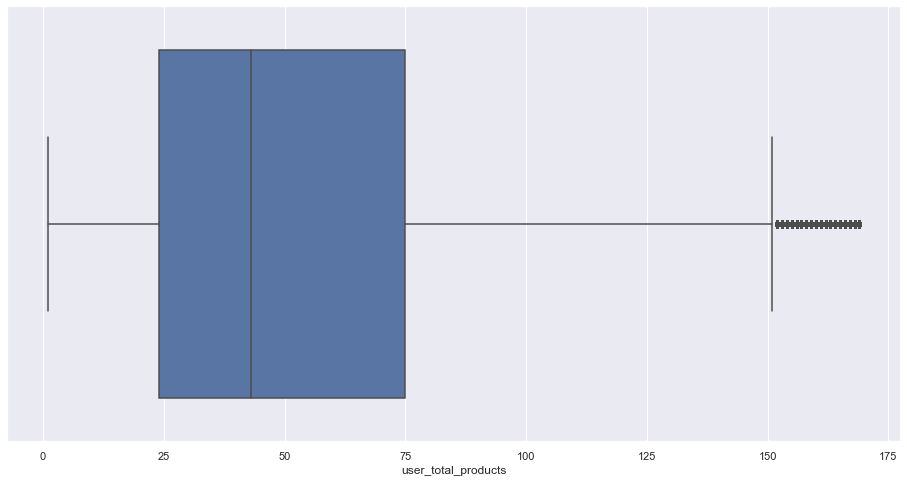

In [54]:
sns.boxplot(df_user_features['user_total_products'])
print(df_user_features['user_total_products'].shape)

In [55]:
# Combined features on user_id
user_total_puchases = user_total_puchases.merge(u_reorder, on='user_id', how='left')
user_total_puchases = user_total_puchases.merge(avg_days_since_prior_order, on='user_id', how='left')
user_total_puchases = user_total_puchases.merge(df_user_features, on='user_id', how='left')

del u_reorder, avg_days_since_prior_order, df_user_features
gc.collect()

user_total_puchases.head()


,user_id,total_orders_for_user,u_reordered_ratio,avg_days_since_prior_order,user_avg_cartsize,user_total_products
0,71915,26,0.660256,11.136752,18.000000,159.0
1,105350,24,0.695652,8.333333,2.875000,21.0
2,115070,11,0.290698,5.232558,7.818182,61.0
3,49540,36,0.361111,10.097222,4.000000,92.0
4,180206,35,0.457227,8.749263,NaN,NaN


In [56]:
print(user_total_puchases.isna().sum())
user_total_puchases.dropna(inplace=True)
print(user_total_puchases.isna().sum())

user_id                          0
total_orders_for_user            0
u_reordered_ratio                0
avg_days_since_prior_order       0
user_avg_cartsize             9147
user_total_products           9147
dtype: int64
user_id                       0
total_orders_for_user         0
u_reordered_ratio             0
avg_days_since_prior_order    0
user_avg_cartsize             0
user_total_products           0
dtype: int64


In [57]:
print(user_total_puchases.shape)

(179160, 6)


### p_total --> total  number of orders for each product

In [58]:
# prd = mergedDF.groupby('product_id')['order_id'].count().to_frame('p_total').reset_index()
# prd.head()

# Using Map Reduce
prd = pd.read_csv("ordersCountPerProductIdCollected.csv", header=None)
prd.columns = ["index","product_id","p_total"]
prd = prd.drop(['index'], axis=1)
prd.head()

,product_id,p_total
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [59]:
prd.describe()

,product_id,p_total
count,49677.000000,49677.000000
mean,24843.417356,652.907563
std,14343.034804,4792.114416
min,1.000000,1.000000
25%,12423.000000,17.000000
50%,24842.000000,60.000000
75%,37264.000000,260.000000
max,49688.000000,472565.000000


(49677,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


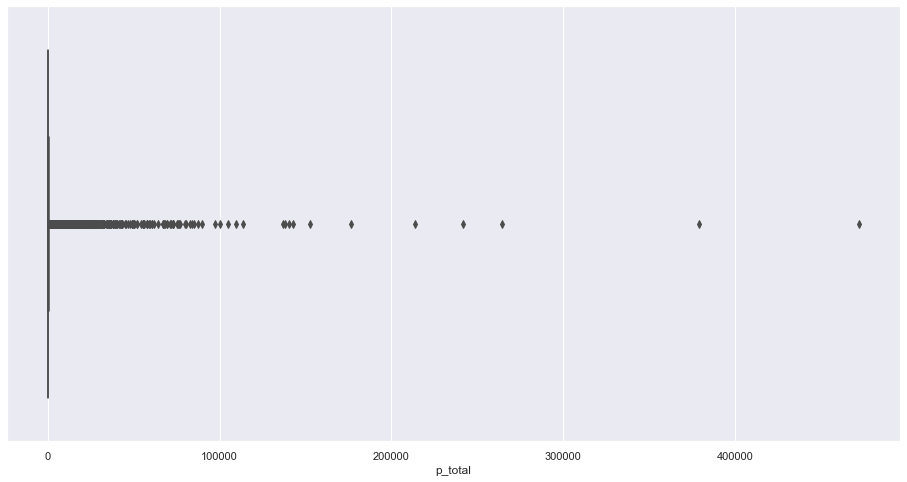

In [60]:
sns.boxplot(prd['p_total'])
print(prd['p_total'].shape)
Q1 =prd['p_total'].quantile(0.25)
Q3 =prd['p_total'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((prd['p_total'] >= (Q3+1.5*IQR)) | (prd['p_total'] <= (Q1-1.5*IQR)))
prd.drop(prd.index[bound[0]],inplace=True)

(42560,)


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


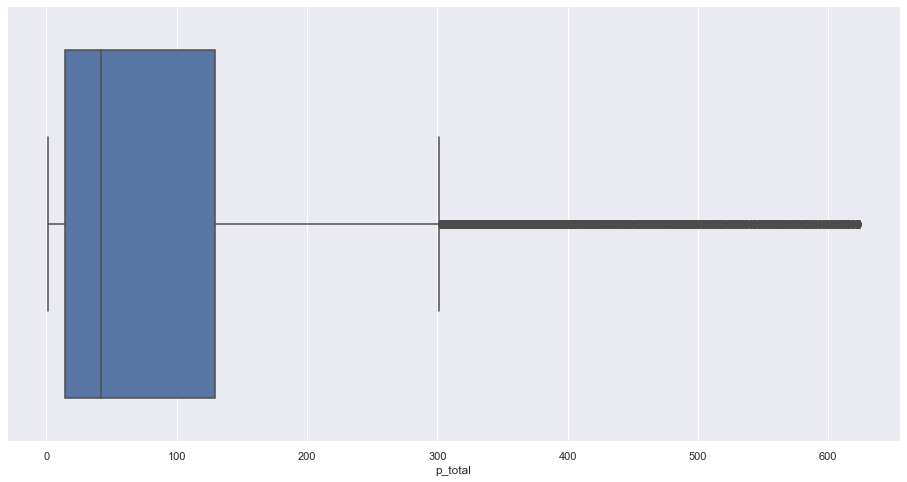

In [61]:
sns.boxplot(prd['p_total'])
print(prd['p_total'].shape)

### p_reorder_ratio --> average reorder ratio per product

In [63]:
p_reorder = mergedDF.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio').reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='p_reorder_ratio'>

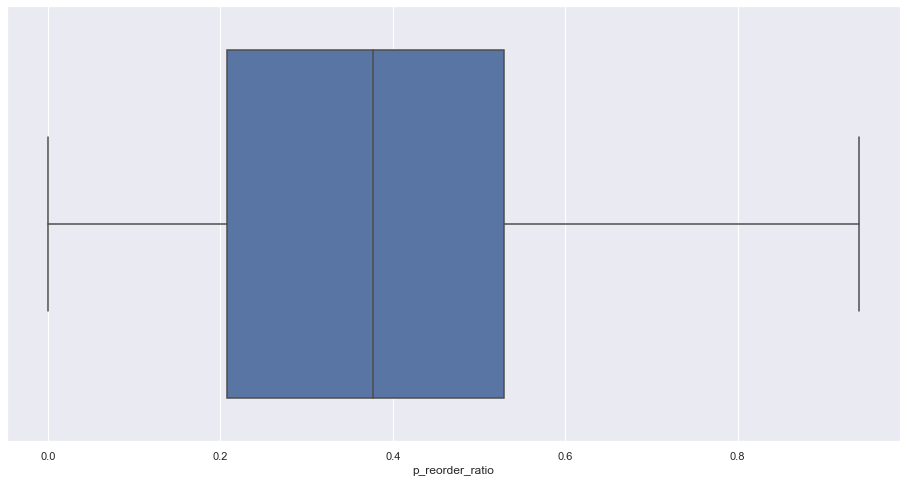

In [64]:
sns.boxplot(p_reorder['p_reorder_ratio'])

In [65]:
# Combined features on product_id
prd = prd.merge(p_reorder, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder
gc.collect()

prd.head()

,product_id,p_total,p_reorder_ratio
0,2,90,0.133333
1,3,277,0.732852
2,4,329,0.446809
3,5,15,0.600000
4,6,8,0.375000


In [66]:
print(prd.isna().sum())

product_id         0
p_total            0
p_reorder_ratio    0
dtype: int64


### uxp_total_bought --> number of times user x bought product y

In [67]:
# Create distinct groups for each combination of user and product, count orders, save the result for each user X product to a new DataFrame 
uxp = mergedDF.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought').reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [68]:
uxp.describe()

,user_id,product_id,uxp_total_bought
count,1.330795e+07,1.330795e+07,1.330795e+07
mean,1.029987e+05,2.551351e+04,2.437226e+00
std,5.943677e+04,1.422429e+04,3.554528e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.157900e+04,1.329200e+04,1.000000e+00
50%,1.027130e+05,2.564000e+04,1.000000e+00
75%,1.544500e+05,3.815700e+04,2.000000e+00
max,2.062090e+05,4.968800e+04,9.900000e+01


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(13307953,)


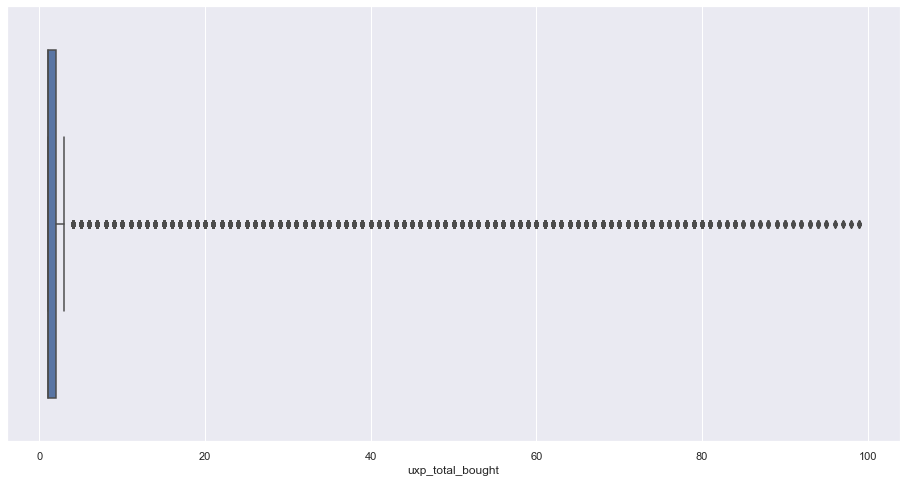

In [69]:
sns.boxplot(uxp['uxp_total_bought'])
print(uxp['uxp_total_bought'].shape)
Q1 =uxp['uxp_total_bought'].quantile(0.25)
Q3 =uxp['uxp_total_bought'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((uxp['uxp_total_bought'] >= (Q3+1.5*IQR)) | (uxp['uxp_total_bought'] <= (Q1-1.5*IQR)))
uxp.drop(uxp.index[bound[0]],inplace=True)

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(11216444,)


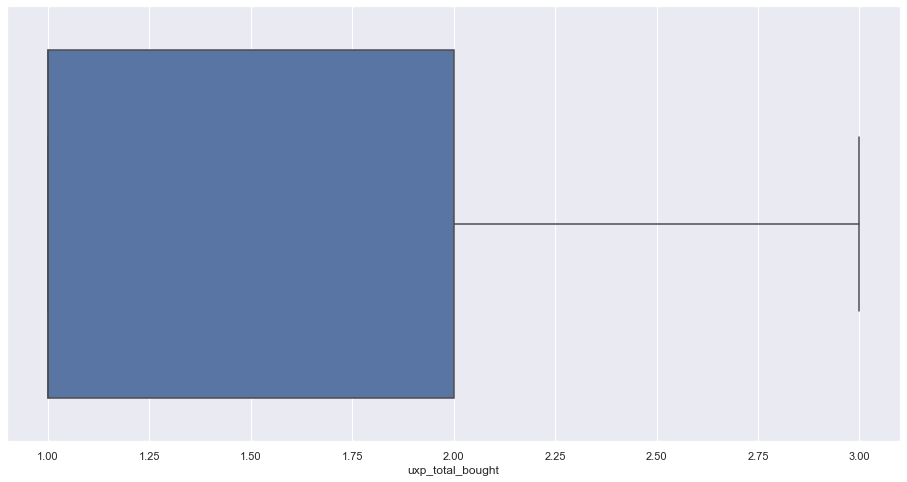

In [70]:
sns.boxplot(uxp['uxp_total_bought'])
print(uxp['uxp_total_bought'].shape)

In [71]:
print(uxp.isna().sum())

user_id             0
product_id          0
uxp_total_bought    0
dtype: int64


### uxp_reorder_ratio 
**-->** Reorder ratio for user x on product y which equals = uxp_total_bought/(total_orders_for_user - first time user x bought product y)

In [72]:
total_orders = mergedDF.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()  

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [73]:
first_order_no = mergedDF.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [74]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [75]:
span['orders_placed_since_first'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,orders_placed_since_first
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [76]:
uxp_ratio = pd.merge(uxp, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,uxp_total_bought,total_orders,first_order_number,orders_placed_since_first
0,1,10326,1,10,5,6
1,1,13032,3,10,2,9
2,1,13176,2,10,2,9
3,1,14084,1,10,1,10
4,1,17122,1,10,5,6


In [77]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.uxp_total_bought / uxp_ratio.orders_placed_since_first
uxp_ratio.head()

,user_id,product_id,uxp_total_bought,total_orders,first_order_number,orders_placed_since_first,uxp_reorder_ratio
0,1,10326,1,10,5,6,0.166667
1,1,13032,3,10,2,9,0.333333
2,1,13176,2,10,2,9,0.222222
3,1,14084,1,10,1,10,0.100000
4,1,17122,1,10,5,6,0.166667


In [78]:
uxp_ratio = uxp_ratio.drop(['uxp_total_bought', 'total_orders', 'first_order_number', 'orders_placed_since_first'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,1,10326,0.166667
1,1,13032,0.333333
2,1,13176,0.222222
3,1,14084,0.100000
4,1,17122,0.166667


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='uxp_reorder_ratio'>

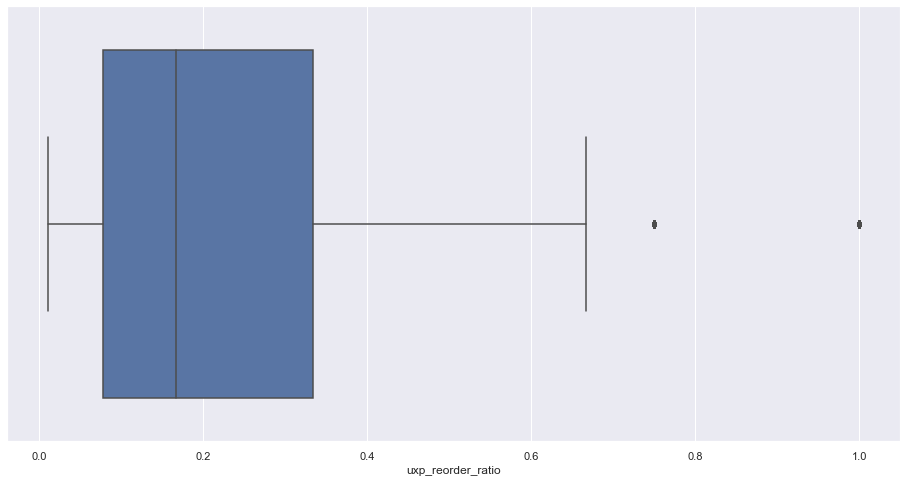

In [79]:
sns.boxplot(uxp_ratio['uxp_reorder_ratio'])

### adding_product_to_cart_time  --> average add to cart time for user x on product y

In [80]:
when_the_user_add_product = mergedDF.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().to_frame('adding_product_to_cart_time')
when_the_user_add_product = when_the_user_add_product.reset_index()
when_the_user_add_product.head()

,user_id,product_id,adding_product_to_cart_time
0,1,196,1.400000
1,1,10258,3.333333
2,1,10326,5.000000
3,1,12427,3.300000
4,1,13032,6.333333


C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(13307953,)


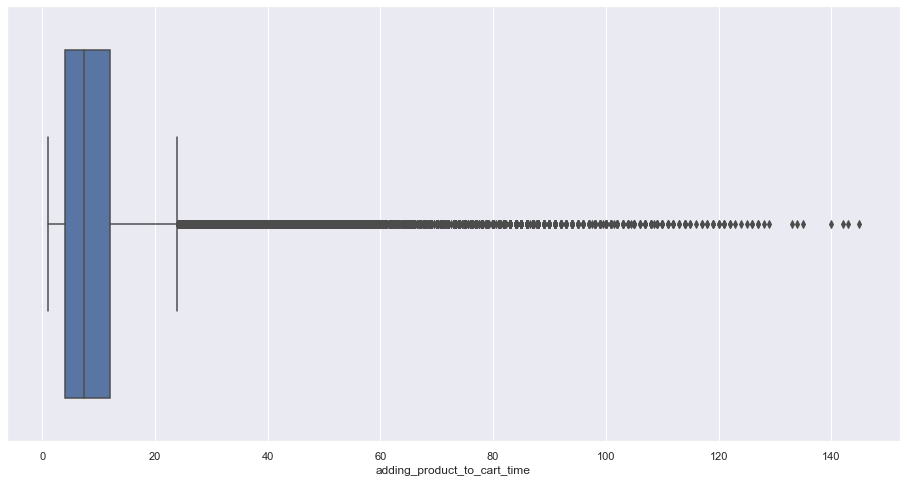

In [81]:
sns.boxplot(when_the_user_add_product['adding_product_to_cart_time'])
print(when_the_user_add_product['adding_product_to_cart_time'].shape)
Q1 =when_the_user_add_product['adding_product_to_cart_time'].quantile(0.25)
Q3 =when_the_user_add_product['adding_product_to_cart_time'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

bound = np.where((when_the_user_add_product['adding_product_to_cart_time'] >= (Q3+1.5*IQR)) | (when_the_user_add_product['adding_product_to_cart_time'] <= (Q1-1.5*IQR)))
when_the_user_add_product.drop(when_the_user_add_product.index[bound[0]],inplace=True)

C:\Users\Hana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(12725673,)


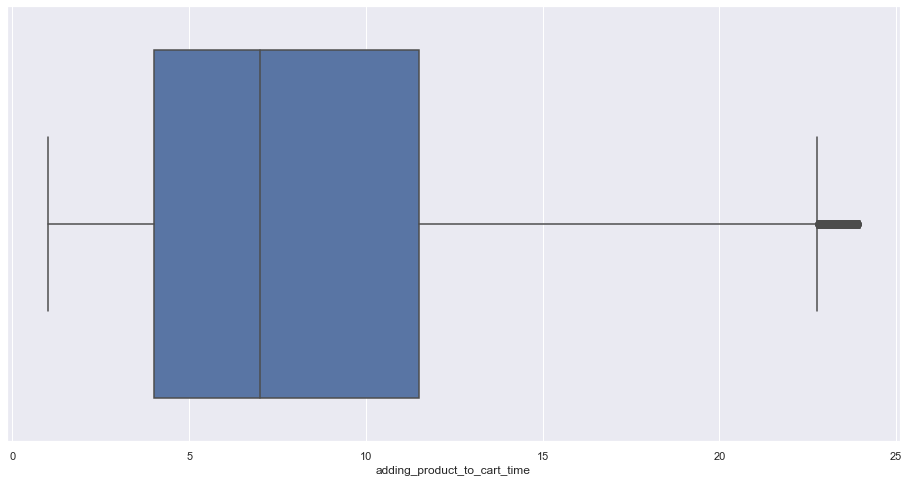

In [82]:
sns.boxplot(when_the_user_add_product['adding_product_to_cart_time'])
print(when_the_user_add_product['adding_product_to_cart_time'].shape)

In [83]:
# when_the_user_add_product['user_product_order_freq'] = uxp['uxp_total_bought'] / user_total_puchases['total_orders_for_user']
# when_the_user_add_product.head()

In [84]:
# Combined features on user_id and product_id
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')
uxp = uxp.merge(when_the_user_add_product, on=['user_id', 'product_id'], how='left')

del uxp_ratio, span,total_orders,first_order_no
del when_the_user_add_product
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,adding_product_to_cart_time
0,1,10326,1,0.166667,5.000000
1,1,13032,3,0.333333,6.333333
2,1,13176,2,0.222222,6.000000
3,1,14084,1,0.100000,2.000000
4,1,17122,1,0.166667,6.000000


In [85]:
print(uxp.isna().sum())
uxp.dropna(inplace =True)
print(uxp.isna().sum())

user_id                             0
product_id                          0
uxp_total_bought                    0
uxp_reorder_ratio                   0
adding_product_to_cart_time    560167
dtype: int64
user_id                        0
product_id                     0
uxp_total_bought               0
uxp_reorder_ratio              0
adding_product_to_cart_time    0
dtype: int64


### Merge all features

In [86]:
#Merge uxp features with the user features and prd features
data = uxp.merge(user_total_puchases, on='user_id', how='left')
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,adding_product_to_cart_time,total_orders_for_user,u_reordered_ratio,avg_days_since_prior_order,user_avg_cartsize,user_total_products,p_total,p_reorder_ratio
0,1,10326,1,0.166667,5.000000,10.0,0.694915,19.474576,5.9,18.0,NaN,NaN
1,1,13032,3,0.333333,6.333333,10.0,0.694915,19.474576,5.9,18.0,NaN,NaN
2,1,13176,2,0.222222,6.000000,10.0,0.694915,19.474576,5.9,18.0,NaN,NaN
3,1,14084,1,0.100000,2.000000,10.0,0.694915,19.474576,5.9,18.0,NaN,NaN
4,1,17122,1,0.166667,6.000000,10.0,0.694915,19.474576,5.9,18.0,NaN,NaN


In [87]:
print(data.isna().sum())
print(data.shape)
data.dropna(inplace=True)
print(data.isna().sum())
print(data.shape)

user_id                              0
product_id                           0
uxp_total_bought                     0
uxp_reorder_ratio                    0
adding_product_to_cart_time          0
total_orders_for_user          2912227
u_reordered_ratio              2912227
avg_days_since_prior_order     2912227
user_avg_cartsize              2912227
user_total_products            2912227
p_total                        8592413
p_reorder_ratio                8592413
dtype: int64
(10656277, 12)
user_id                        0
product_id                     0
uxp_total_bought               0
uxp_reorder_ratio              0
adding_product_to_cart_time    0
total_orders_for_user          0
u_reordered_ratio              0
avg_days_since_prior_order     0
user_avg_cartsize              0
user_total_products            0
p_total                        0
p_reorder_ratio                0
dtype: int64
(1456019, 12)


In [88]:
del uxp,user_total_puchases,prd
gc.collect()


12500

<AxesSubplot:>

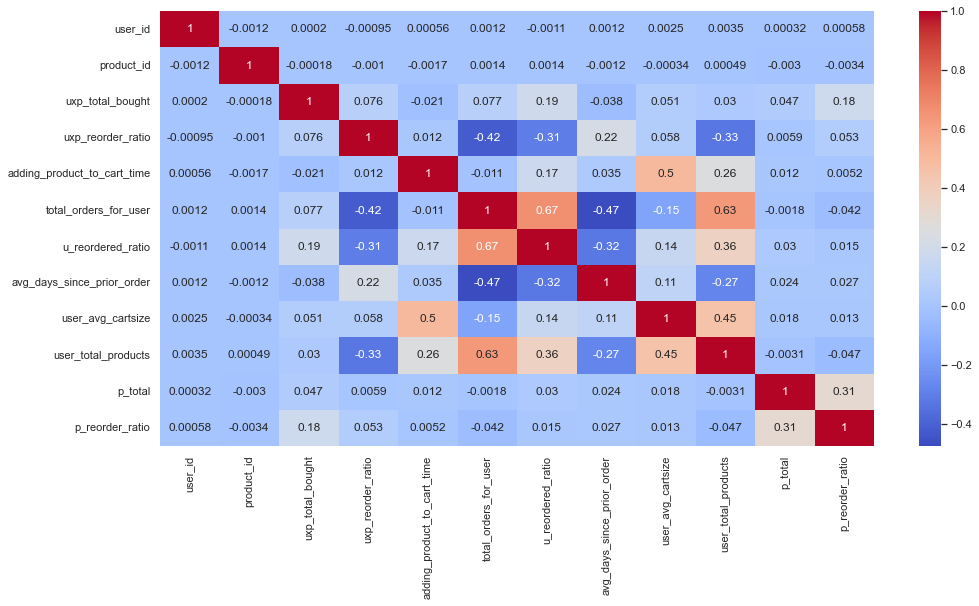

In [89]:
correlationMatrix = data.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlationMatrix, annot = True, fmt='.2g',cmap= 'coolwarm')

### Merge features with corresponding y_train

In [90]:
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head()

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797


In [91]:
data = data.merge(orders_future, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,adding_product_to_cart_time,total_orders_for_user,u_reordered_ratio,avg_days_since_prior_order,user_avg_cartsize,user_total_products,p_total,p_reorder_ratio,eval_set,order_id
0,2,3151,1,0.333333,7.0,14.0,0.476923,15.635897,13.928571,102.0,460.0,0.593478,train,1492625
1,2,5869,1,0.500000,4.0,14.0,0.476923,15.635897,13.928571,102.0,111.0,0.450450,train,1492625
2,2,5907,1,0.100000,7.0,14.0,0.476923,15.635897,13.928571,102.0,550.0,0.607273,train,1492625
3,2,8296,1,0.250000,12.0,14.0,0.476923,15.635897,13.928571,102.0,276.0,0.402174,train,1492625
4,2,13742,1,0.166667,7.0,14.0,0.476923,15.635897,13.928571,102.0,66.0,0.196970,train,1492625


In [92]:
mergedDF.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,11.0,196,1,0
1,2539329,1,prior,1,2,8,11.0,14084,2,0
2,2539329,1,prior,1,2,8,11.0,12427,3,0
3,2539329,1,prior,1,2,8,11.0,26088,4,0
4,2539329,1,prior,1,2,8,11.0,26405,5,0


In [93]:
data_original = mergedDF.drop(['reordered','eval_set','order_id'], axis=1).merge(orders_future, on='user_id', how='left')
data_original.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,eval_set,order_id
0,1,1,2,8,11.0,196,1,train,1187899
1,1,1,2,8,11.0,14084,2,train,1187899
2,1,1,2,8,11.0,12427,3,train,1187899
3,1,1,2,8,11.0,26088,4,train,1187899
4,1,1,2,8,11.0,26405,5,train,1187899


In [94]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train']
data_train.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,adding_product_to_cart_time,total_orders_for_user,u_reordered_ratio,avg_days_since_prior_order,user_avg_cartsize,user_total_products,p_total,p_reorder_ratio,eval_set,order_id
0,2,3151,1,0.333333,7.0,14.0,0.476923,15.635897,13.928571,102.0,460.0,0.593478,train,1492625
1,2,5869,1,0.500000,4.0,14.0,0.476923,15.635897,13.928571,102.0,111.0,0.450450,train,1492625
2,2,5907,1,0.100000,7.0,14.0,0.476923,15.635897,13.928571,102.0,550.0,0.607273,train,1492625
3,2,8296,1,0.250000,12.0,14.0,0.476923,15.635897,13.928571,102.0,276.0,0.402174,train,1492625
4,2,13742,1,0.166667,7.0,14.0,0.476923,15.635897,13.928571,102.0,66.0,0.196970,train,1492625


In [95]:
data_train_original = data_original[data_original.eval_set=='train']
data_train_original.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,eval_set,order_id
0,1,1,2,8,11.0,196,1,train,1187899
1,1,1,2,8,11.0,14084,2,train,1187899
2,1,1,2,8,11.0,12427,3,train,1187899
3,1,1,2,8,11.0,26088,4,train,1187899
4,1,1,2,8,11.0,26405,5,train,1187899


In [96]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head()


,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,adding_product_to_cart_time,total_orders_for_user,u_reordered_ratio,avg_days_since_prior_order,user_avg_cartsize,user_total_products,p_total,p_reorder_ratio,eval_set,order_id,reordered
0,2,3151,1,0.333333,7.0,14.0,0.476923,15.635897,13.928571,102.0,460.0,0.593478,train,1492625,NaN
1,2,5869,1,0.500000,4.0,14.0,0.476923,15.635897,13.928571,102.0,111.0,0.450450,train,1492625,NaN
2,2,5907,1,0.100000,7.0,14.0,0.476923,15.635897,13.928571,102.0,550.0,0.607273,train,1492625,NaN
3,2,8296,1,0.250000,12.0,14.0,0.476923,15.635897,13.928571,102.0,276.0,0.402174,train,1492625,NaN
4,2,13742,1,0.166667,7.0,14.0,0.476923,15.635897,13.928571,102.0,66.0,0.196970,train,1492625,NaN


In [97]:
data_train_original = data_train_original.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train_original.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,eval_set,order_id,reordered
0,1,1,2,8,11.0,196,1,train,1187899,1.0
1,1,1,2,8,11.0,14084,2,train,1187899,NaN
2,1,1,2,8,11.0,12427,3,train,1187899,NaN
3,1,1,2,8,11.0,26088,4,train,1187899,1.0
4,1,1,2,8,11.0,26405,5,train,1187899,1.0


In [98]:
print(data_train.isna().sum())

user_id                             0
product_id                          0
uxp_total_bought                    0
uxp_reorder_ratio                   0
adding_product_to_cart_time         0
total_orders_for_user               0
u_reordered_ratio                   0
avg_days_since_prior_order          0
user_avg_cartsize                   0
user_total_products                 0
p_total                             0
p_reorder_ratio                     0
eval_set                            0
order_id                            0
reordered                      875212
dtype: int64


In [99]:
print(data_train_original.isna().sum())

user_id                          0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order           0
product_id                       0
add_to_cart_order                0
eval_set                         0
order_id                         0
reordered                 16403988
dtype: int64


*When merging between the features and the reordered label in order_products_train, a lot of product ids are not present in this csv which means that this product_id was not purchased in that order_id , or else it would've been mentioned. Therefore replace all nan values with 0*

In [100]:
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head()
data_train_original['reordered'] = data_train_original['reordered'].fillna(0)
data_train_original.head()

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,eval_set,order_id,reordered
0,1,1,2,8,11.0,196,1,train,1187899,1.0
1,1,1,2,8,11.0,14084,2,train,1187899,0.0
2,1,1,2,8,11.0,12427,3,train,1187899,0.0
3,1,1,2,8,11.0,26088,4,train,1187899,1.0
4,1,1,2,8,11.0,26405,5,train,1187899,1.0


In [101]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head()
data_train_original = data_train_original.set_index(['user_id', 'product_id'])
data_train_original.head()

order_number  order_dow  order_hour_of_day  \
user_id product_id                                               
1       196                    1          2                  8   
        14084                  1          2                  8   
        12427                  1          2                  8   
        26088                  1          2                  8   
        26405                  1          2                  8   

                    days_since_prior_order  add_to_cart_order eval_set  \
user_id product_id                                                       
1       196                           11.0                  1    train   
        14084                         11.0                  2    train   
        12427                         11.0                  3    train   
        26088                         11.0                  4    train   
        26405                         11.0                  5    train   

                    order_id  reordered  
user_id product_id                       
1       196          1187899        1.0  
        14084        1187899        0.0  
        12427        1187899        0.0  
        26088        1187899        1.0  
        26405        1187899        1.0

In [102]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head()


uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
2       3151                       1           0.333333   
        5869                       1           0.500000   
        5907                       1           0.100000   
        8296                       1           0.250000   
        13742                      1           0.166667   

                    adding_product_to_cart_time  total_orders_for_user  \
user_id product_id                                                       
2       3151                                7.0                   14.0   
        5869                                4.0                   14.0   
        5907                                7.0                   14.0   
        8296                               12.0                   14.0   
        13742                               7.0                   14.0   

                    u_reordered_ratio  avg_days_since_prior_order  \
user_id product_id                                                  
2       3151                 0.476923                   15.635897   
        5869                 0.476923                   15.635897   
        5907                 0.476923                   15.635897   
        8296                 0.476923                   15.635897   
        13742                0.476923                   15.635897   

                    user_avg_cartsize  user_total_products  p_total  \
user_id product_id                                                    
2       3151                13.928571                102.0    460.0   
        5869                13.928571                102.0    111.0   
        5907                13.928571                102.0    550.0   
        8296                13.928571                102.0    276.0   
        13742               13.928571                102.0     66.0   

                    p_reorder_ratio  reordered  
user_id product_id                              
2       3151               0.593478        0.0  
        5869               0.450450        0.0  
        5907               0.607273        0.0  
        8296               0.402174        0.0  
        13742              0.196970        0.0

In [103]:

data_train_original = data_train_original.drop(['eval_set', 'order_id'], axis=1)
data_train_original.head()

order_number  order_dow  order_hour_of_day  \
user_id product_id                                               
1       196                    1          2                  8   
        14084                  1          2                  8   
        12427                  1          2                  8   
        26088                  1          2                  8   
        26405                  1          2                  8   

                    days_since_prior_order  add_to_cart_order  reordered  
user_id product_id                                                        
1       196                           11.0                  1        1.0  
        14084                         11.0                  2        0.0  
        12427                         11.0                  3        0.0  
        26088                         11.0                  4        1.0  
        26405                         11.0                  5        1.0

## Normalization of variables

In [104]:
df_x = data_train[['uxp_total_bought','uxp_reorder_ratio','adding_product_to_cart_time','total_orders_for_user','u_reordered_ratio','avg_days_since_prior_order','user_avg_cartsize','user_total_products','p_total','p_reorder_ratio']]
data_train[['uxp_total_bought','uxp_reorder_ratio','adding_product_to_cart_time','total_orders_for_user','u_reordered_ratio','avg_days_since_prior_order','user_avg_cartsize','user_total_products','p_total','p_reorder_ratio']] = (df_x - df_x.min()) / (df_x.max() - df_x.min())


In [105]:
data_train.shape

(925417, 11)

In [106]:
data_train.head()

uxp_total_bought  uxp_reorder_ratio  \
user_id product_id                                        
2       3151                     0.0           0.315789   
        5869                     0.0           0.486842   
        5907                     0.0           0.076316   
        8296                     0.0           0.230263   
        13742                    0.0           0.144737   

                    adding_product_to_cart_time  total_orders_for_user  \
user_id product_id                                                       
2       3151                           0.264706               0.305556   
        5869                           0.132353               0.305556   
        5907                           0.264706               0.305556   
        8296                           0.485294               0.305556   
        13742                          0.264706               0.305556   

                    u_reordered_ratio  avg_days_since_prior_order  \
user_id product_id                                                  
2       3151                 0.502024                    0.511677   
        5869                 0.502024                    0.511677   
        5907                 0.502024                    0.511677   
        8296                 0.502024                    0.511677   
        13742                0.502024                    0.511677   

                    user_avg_cartsize  user_total_products   p_total  \
user_id product_id                                                     
2       3151                 0.565002              0.60119  0.736758   
        5869                 0.565002              0.60119  0.176565   
        5907                 0.565002              0.60119  0.881220   
        8296                 0.565002              0.60119  0.441413   
        13742                0.565002              0.60119  0.104334   

                    p_reorder_ratio  reordered  
user_id product_id                              
2       3151               0.630571        0.0  
        5869               0.478604        0.0  
        5907               0.645227        0.0  
        8296               0.427310        0.0  
        13742              0.209280        0.0

<AxesSubplot:>

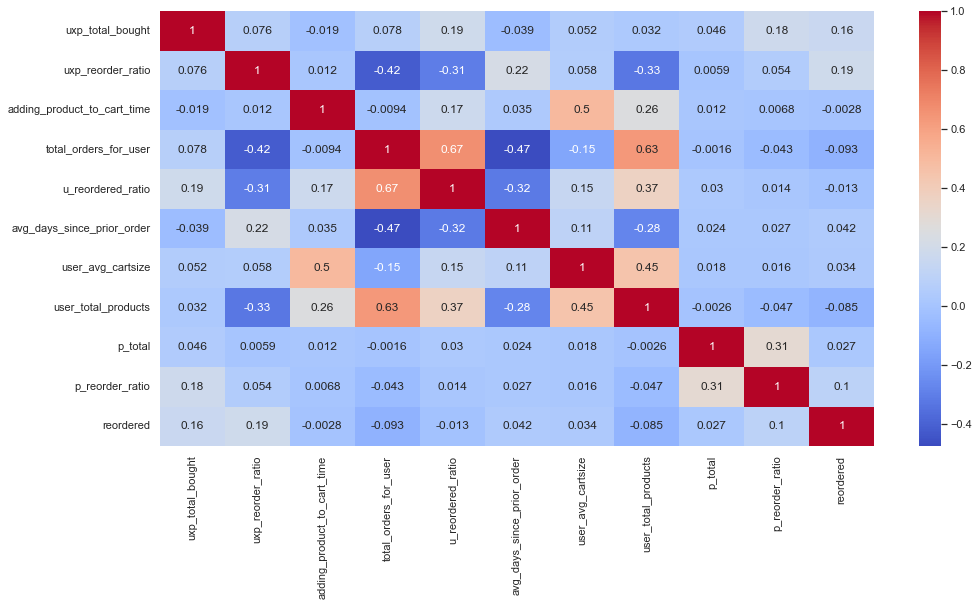

In [107]:
correlationMatrix = data_train.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlationMatrix, annot = True, fmt='.2g',cmap= 'coolwarm')

The correlation Matrix shows the relationship between the reordered column and the other features 
uxp_total_bought  and
uxp_reorder_ratio are the ones most correlated to reordered followed by 
p_reordered_ratio and 
p_total 

A lot of features seem to be correlated together like  

total_orders_for_user and avg_days_since_prior_order 

total_orders_for_user and user_total_products 

total_orders_for_user and u_reordered_ratio 

Try removing  total_orders_for_user, add_to_cart_order

<AxesSubplot:>

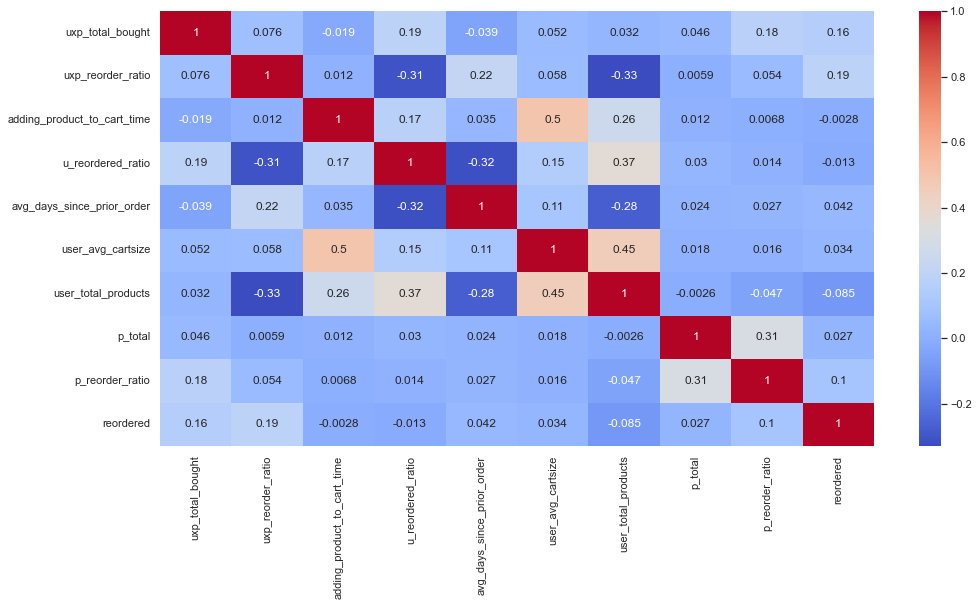

In [108]:
correlationMatrix = data_train.drop(['total_orders_for_user'], axis=1).corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlationMatrix, annot = True, fmt='.2g',cmap= 'coolwarm')

<AxesSubplot:>

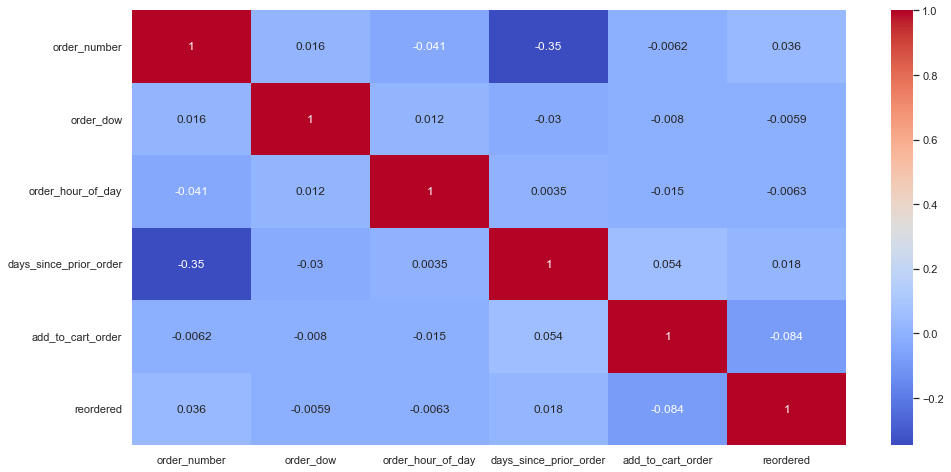

In [109]:
correlationMatrix = data_train_original.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlationMatrix, annot = True, fmt='.2g',cmap= 'coolwarm')

In [110]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
X = data_train.drop('reordered', axis=1)
y = data_train.reordered
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs         Score
0             uxp_total_bought  13678.228512
1            uxp_reorder_ratio   9434.724564
3        total_orders_for_user   1641.620354
7          user_total_products    840.347723
9              p_reorder_ratio    711.227091
8                      p_total    129.934087
5   avg_days_since_prior_order    115.047925
6            user_avg_cartsize    102.220909
4            u_reordered_ratio     13.647503
2  adding_product_to_cart_time      1.286818


# Model Training

In [111]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [112]:
def train(X_train, y_train,X_test,y_test):
    classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()
        ]

    log_cols=["Classifier", "Accuracy", "Precision","Recall","F1Score","Log Loss"] #"ROC AUC",
    log = pd.DataFrame(columns=log_cols)

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        f1 = f1_score(train_predictions,y_test)
        pre = precision_score(train_predictions,y_test)
        rec = recall_score(train_predictions,y_test)
#         auc = roc_auc_score(train_predictions,y_test)
        print("Accuracy: {:.4%}".format(acc))
        print("Precision: {:.4%}".format(pre))
        print("Recall: {:.4%}".format(rec))
        print("F1 Score: {:.4%}".format(f1))
#         print("ROC AUC: {:.4%}".format(auc))

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        print("Log Loss: {:.4}".format(ll))

        # Plot non-normalized confusion matrix
        titles_options = [("Confusion matrix", None),
                          ("Normalized confusion matrix", 'false')]

        np.set_printoptions(precision=2)
        plt.figure(),
        plt.style.use('default')

        for title, normalize in titles_options:
            disp = plot_confusion_matrix(clf, X_test, y_test,
                                         display_labels=["not reorder","reorder"],
                                         cmap=plt.cm.Blues,values_format='.0f'
                                         )
            disp.ax_.set_title(title)

            print(title)
            print(disp.confusion_matrix)

        plt.show()

        log_entry = pd.DataFrame([[name, acc*100, pre*100, rec*100,f1*100,ll]], columns=log_cols)
        log = log.append(log_entry)
    print("="*30)
    return round(log,3)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
data_train.dropna(inplace=True)
data_train.loc[:, 'reordered'] = data_train.reordered.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered,test_size=0.2, random_state=42)


In [114]:
X_train.isnull().values.any()

False

LogisticRegression
****Results****
Accuracy: 94.5965%
Precision: 1.7952%
Recall: 53.8922%
F1 Score: 3.4746%
Log Loss: 0.1832
Confusion matrix
[[174903    154]
 [  9847    180]]
Normalized confusion matrix
[[174903    154]
 [  9847    180]]


<Figure size 1152x576 with 0 Axes>

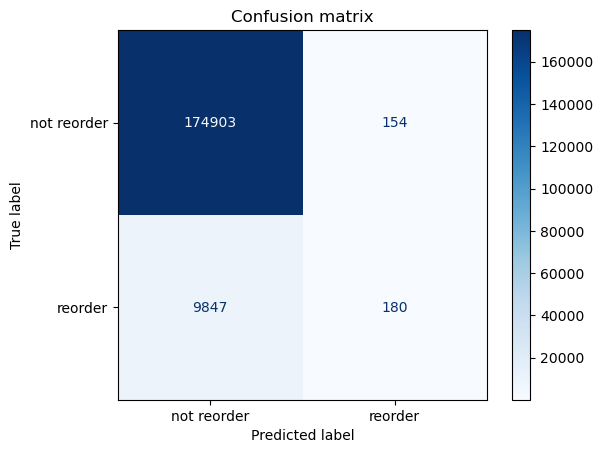

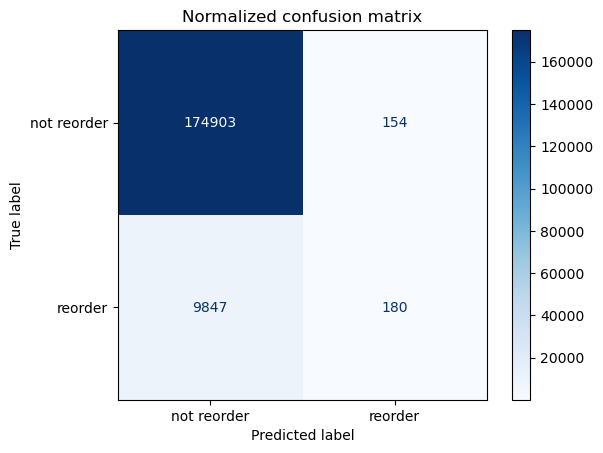

KNeighborsClassifier
****Results****
Accuracy: 93.6272%
Precision: 8.2477%
Recall: 24.1672%
F1 Score: 12.2983%
Log Loss: 1.384
Confusion matrix
[[172462   2595]
 [  9200    827]]
Normalized confusion matrix
[[172462   2595]
 [  9200    827]]


<Figure size 640x480 with 0 Axes>

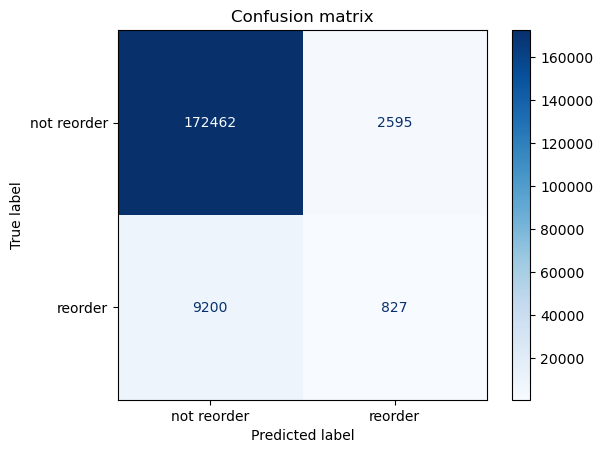

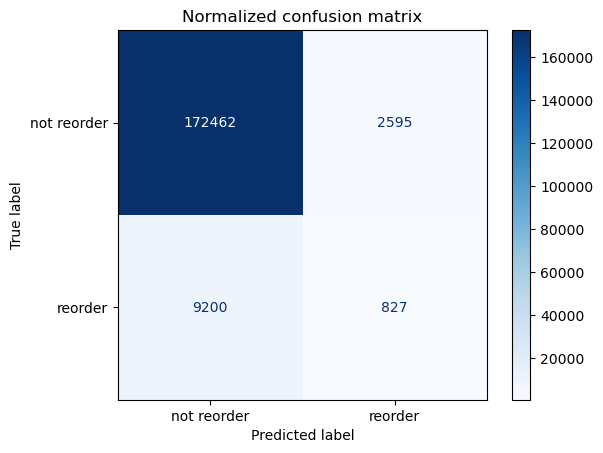

DecisionTreeClassifier
****Results****
Accuracy: 89.9797%
Precision: 16.8146%
Recall: 14.1788%
F1 Score: 15.3846%
Log Loss: 3.461
Confusion matrix
[[164852  10205]
 [  8341   1686]]
Normalized confusion matrix
[[164852  10205]
 [  8341   1686]]


<Figure size 640x480 with 0 Axes>

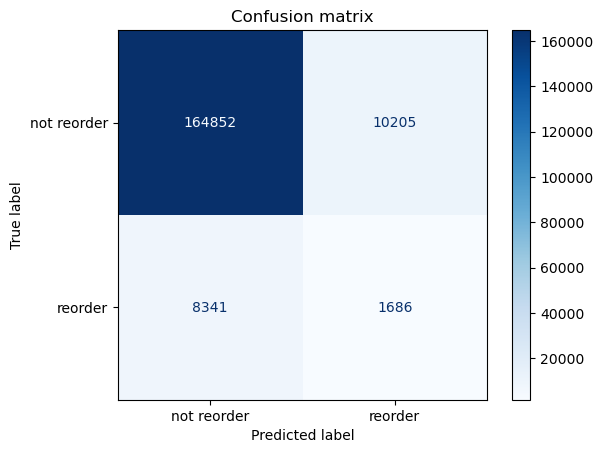

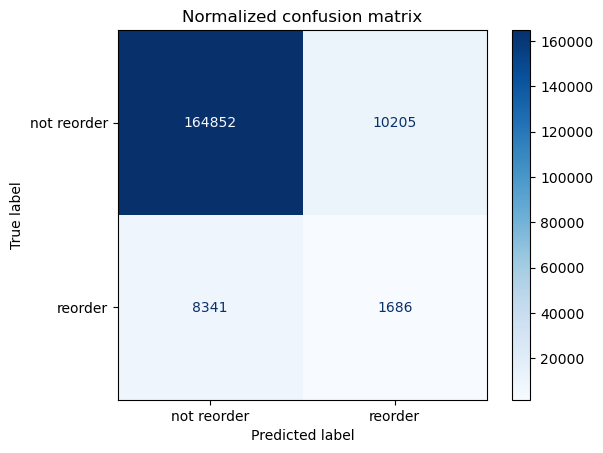

RandomForestClassifier
****Results****
Accuracy: 94.5884%
Precision: 3.2612%
Recall: 50.8554%
F1 Score: 6.1293%
Log Loss: 0.2454
Confusion matrix
[[174741    316]
 [  9700    327]]
Normalized confusion matrix
[[174741    316]
 [  9700    327]]


<Figure size 640x480 with 0 Axes>

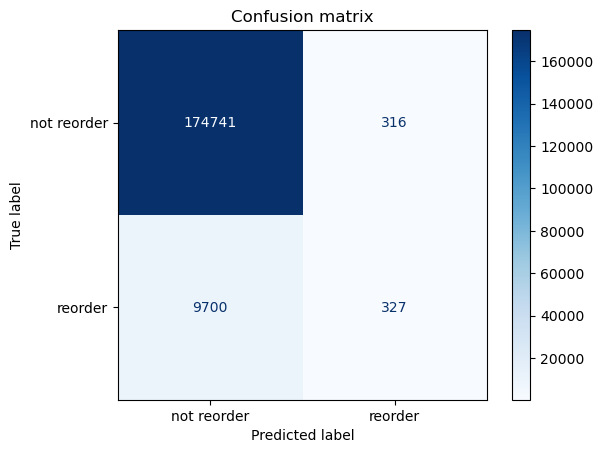

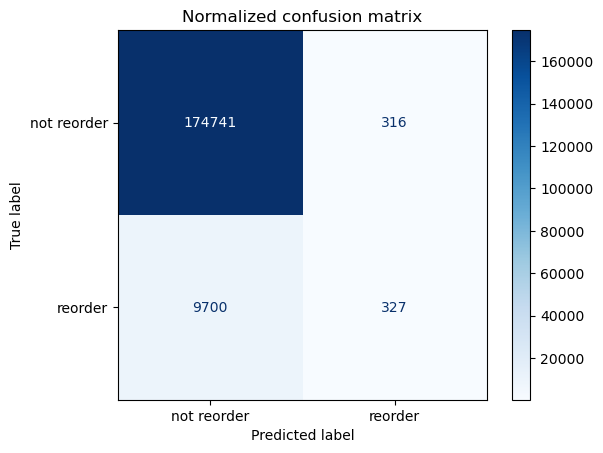

AdaBoostClassifier
****Results****
Accuracy: 94.5857%
Precision: 0.2493%
Recall: 56.8182%
F1 Score: 0.4965%
Log Loss: 0.6626
Confusion matrix
[[175038     19]
 [ 10002     25]]
Normalized confusion matrix
[[175038     19]
 [ 10002     25]]


<Figure size 640x480 with 0 Axes>

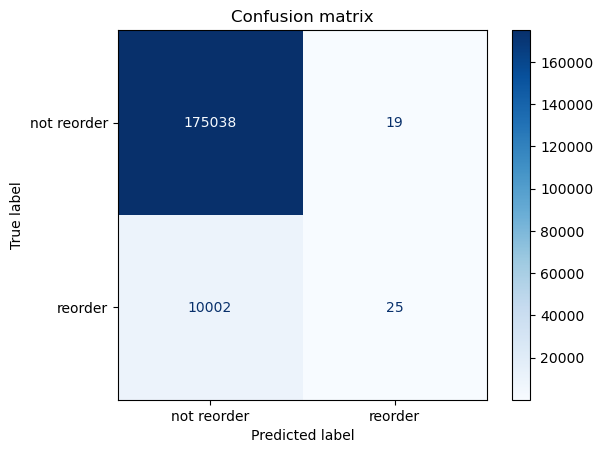

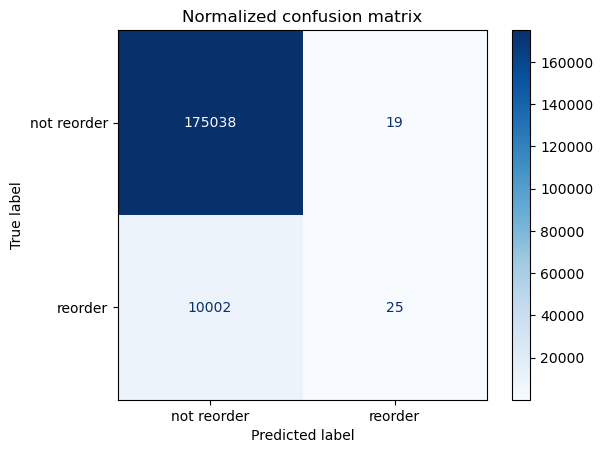

GradientBoostingClassifier
****Results****
Accuracy: 94.6030%
Precision: 2.2838%
Recall: 54.5238%
F1 Score: 4.3840%
Log Loss: 0.1814
Confusion matrix
[[174866    191]
 [  9798    229]]
Normalized confusion matrix
[[174866    191]
 [  9798    229]]


<Figure size 640x480 with 0 Axes>

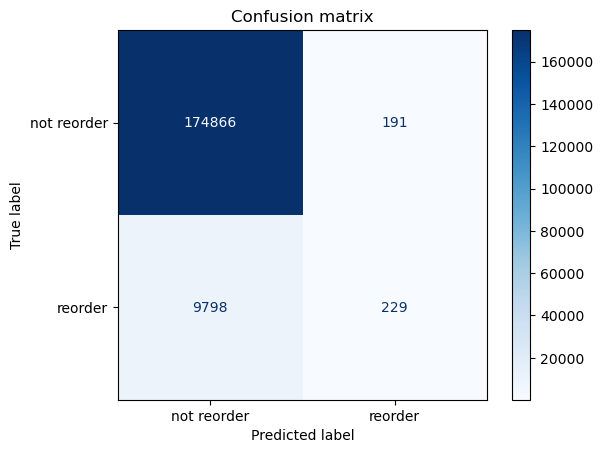

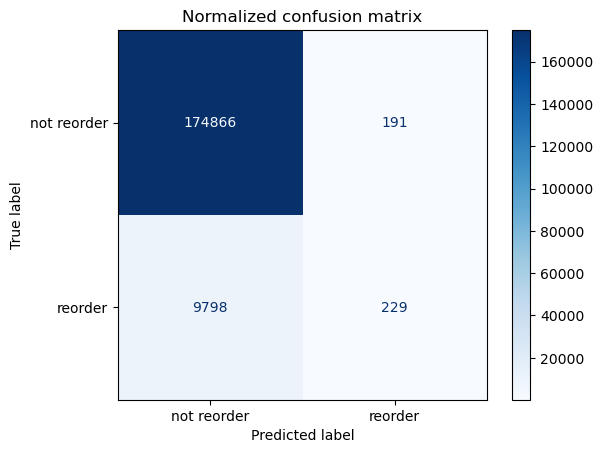

GaussianNB
****Results****
Accuracy: 92.0971%
Precision: 20.4647%
Recall: 23.5754%
F1 Score: 21.9102%
Log Loss: 0.233
Confusion matrix
[[168405   6652]
 [  7975   2052]]
Normalized confusion matrix
[[168405   6652]
 [  7975   2052]]


<Figure size 640x480 with 0 Axes>

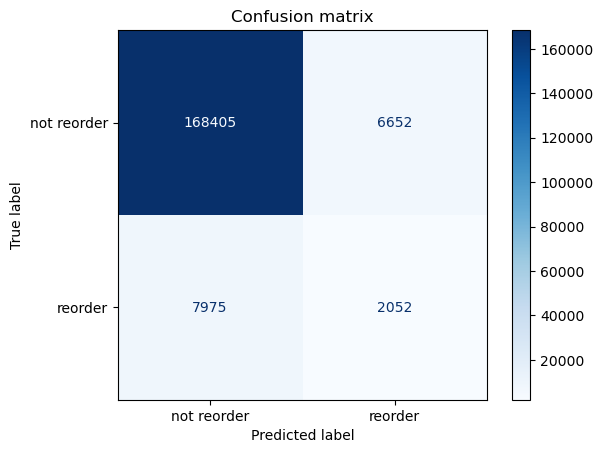

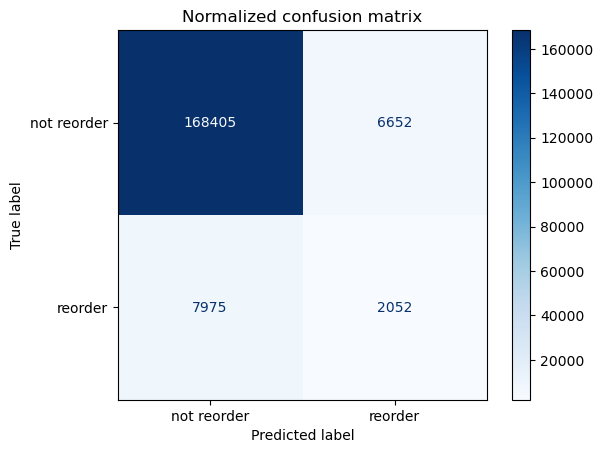

,Classifier,Accuracy,Precision,Recall,F1Score,Log Loss
0,LogisticRegression,94.597,1.795,53.892,3.475,0.183
0,KNeighborsClassifier,93.627,8.248,24.167,12.298,1.384
0,DecisionTreeClassifier,89.980,16.815,14.179,15.385,3.461
0,RandomForestClassifier,94.588,3.261,50.855,6.129,0.245
0,AdaBoostClassifier,94.586,0.249,56.818,0.496,0.663
0,GradientBoostingClassifier,94.603,2.284,54.524,4.384,0.181
0,GaussianNB,92.097,20.465,23.575,21.910,0.233


In [115]:
train(X_train, y_train,X_test,y_test)

In [116]:
target_count = data_train.reordered.value_counts()
target_count

0.0    875212
1.0     50205
Name: reordered, dtype: int64

<AxesSubplot:title={'center':'Class Count'}>

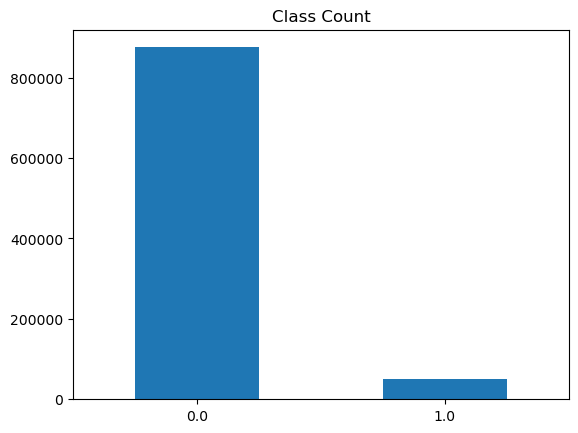

In [117]:
target_count.plot(kind='bar', title='Class Count', rot=0)

*Data is so biased so we need to fix this problem using RandomOverSampler*

In [118]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

## OverSampling

In [119]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data_train.drop('reordered', axis=1),data_train.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)


In [120]:
target_count = y_resampled.value_counts()
target_count

0.0    875212
1.0    875212
Name: reordered, dtype: int64

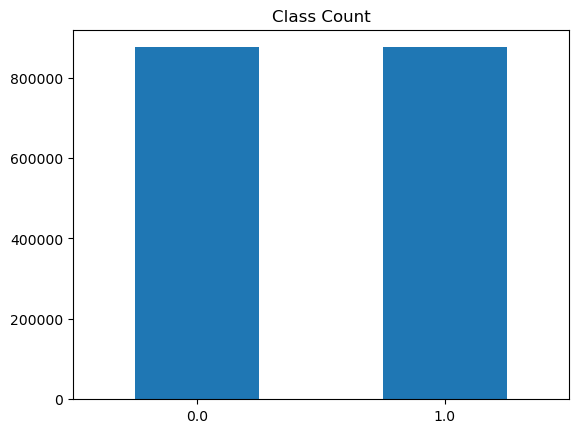

In [121]:
target_count.plot(kind='bar', title='Class Count', rot=0);

LogisticRegression
****Results****
Accuracy: 70.0518%
Precision: 66.7524%
Recall: 71.5241%
F1 Score: 69.0560%
Log Loss: 0.5733
Confusion matrix
[[128254  46576]
 [ 58268 116987]]
Normalized confusion matrix
[[128254  46576]
 [ 58268 116987]]


<Figure size 640x480 with 0 Axes>

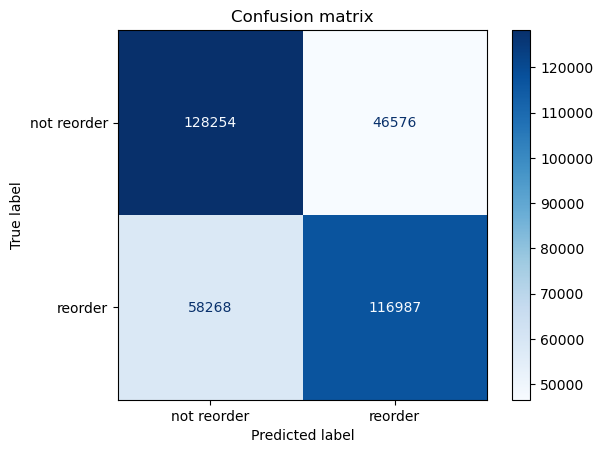

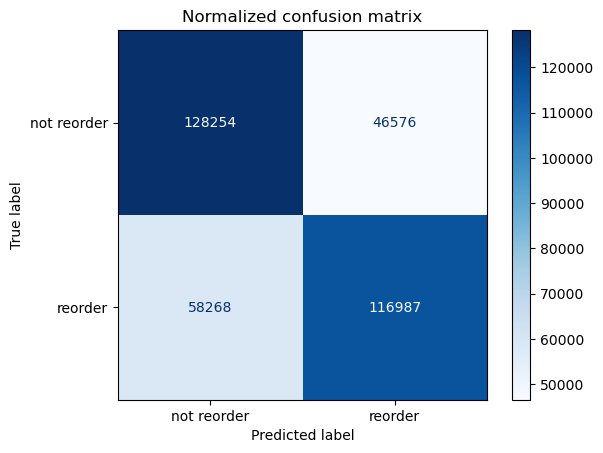

KNeighborsClassifier
****Results****
Accuracy: 94.4762%
Precision: 100.0000%
Recall: 90.0623%
F1 Score: 94.7714%
Log Loss: 1.069
Confusion matrix
[[155492  19338]
 [     0 175255]]
Normalized confusion matrix
[[155492  19338]
 [     0 175255]]


<Figure size 640x480 with 0 Axes>

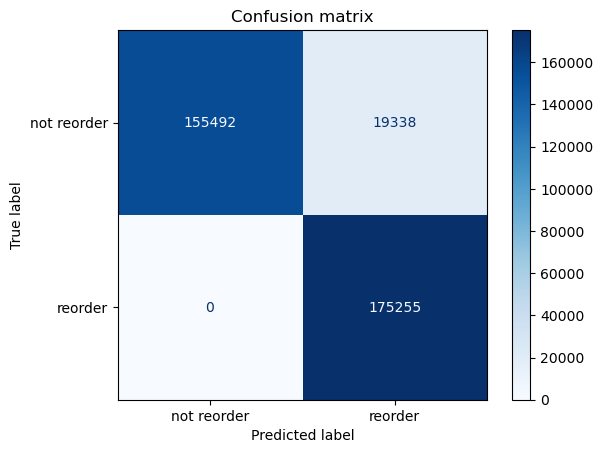

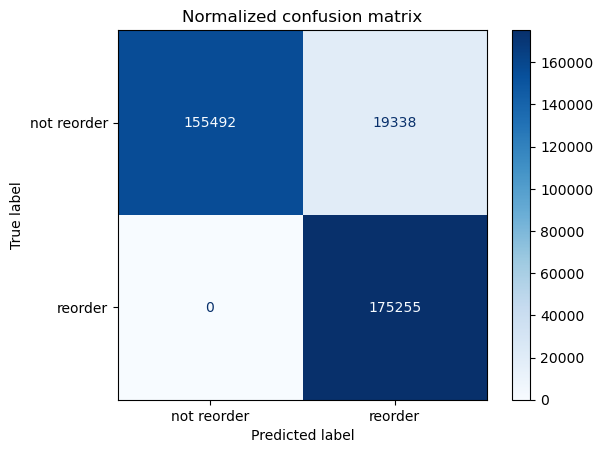

DecisionTreeClassifier
****Results****
Accuracy: 96.9956%
Precision: 100.0000%
Recall: 94.3383%
F1 Score: 97.0867%
Log Loss: 1.038
Confusion matrix
[[164312  10518]
 [     0 175255]]
Normalized confusion matrix
[[164312  10518]
 [     0 175255]]


<Figure size 640x480 with 0 Axes>

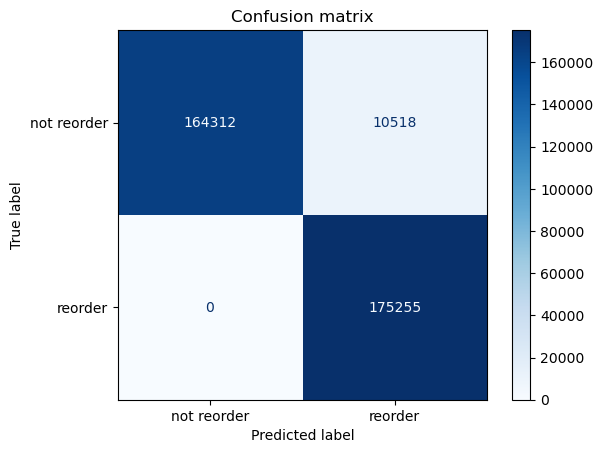

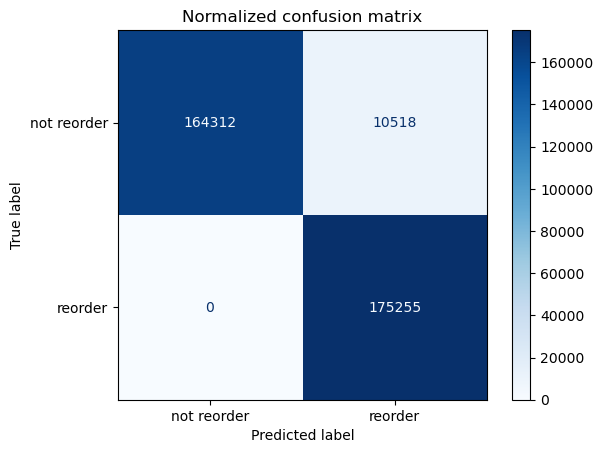

RandomForestClassifier
****Results****
Accuracy: 99.6081%
Precision: 100.0000%
Recall: 99.2232%
F1 Score: 99.6101%
Log Loss: 0.04833
Confusion matrix
[[173458   1372]
 [     0 175255]]
Normalized confusion matrix
[[173458   1372]
 [     0 175255]]


<Figure size 640x480 with 0 Axes>

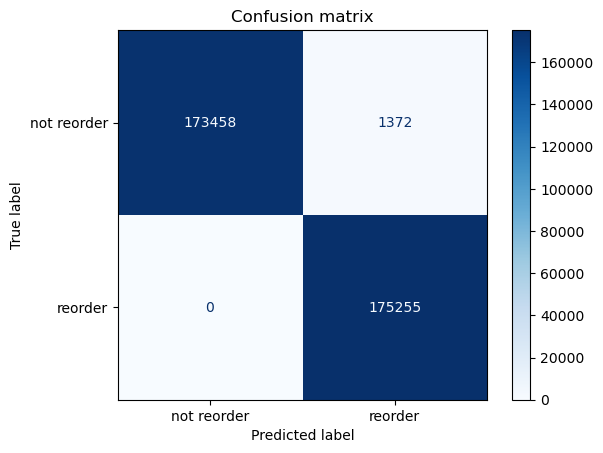

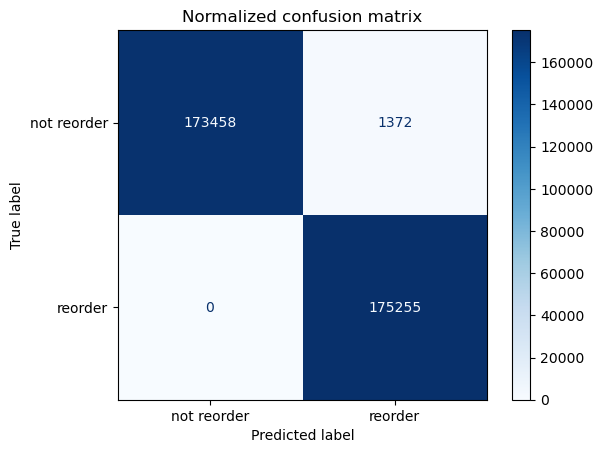

AdaBoostClassifier
****Results****
Accuracy: 70.5229%
Precision: 70.9583%
Recall: 70.3956%
F1 Score: 70.6758%
Log Loss: 0.6874
Confusion matrix
[[122532  52298]
 [ 50897 124358]]
Normalized confusion matrix
[[122532  52298]
 [ 50897 124358]]


<Figure size 640x480 with 0 Axes>

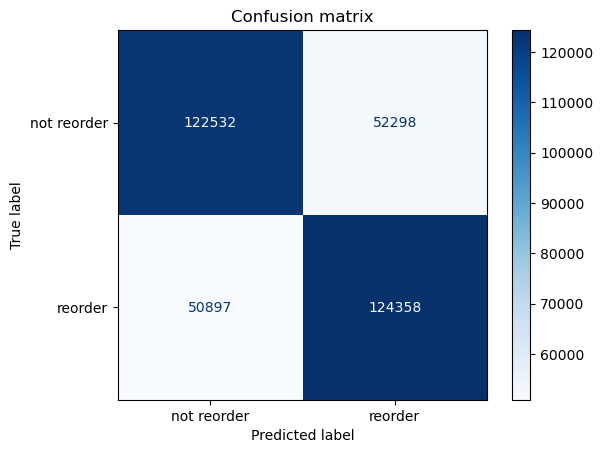

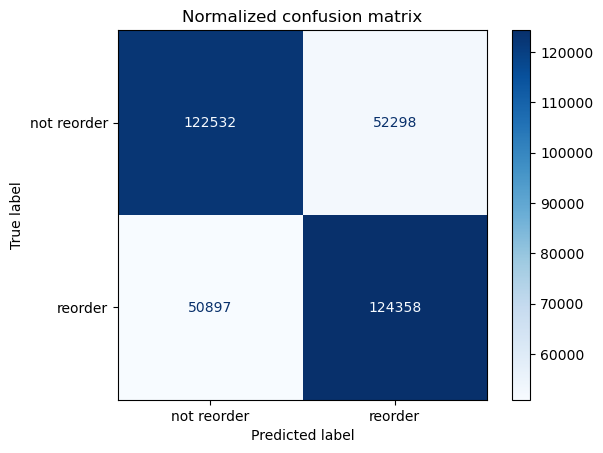

GradientBoostingClassifier
****Results****
Accuracy: 71.0008%
Precision: 70.8100%
Recall: 71.1314%
F1 Score: 70.9703%
Log Loss: 0.5615
Confusion matrix
[[124465  50365]
 [ 51157 124098]]
Normalized confusion matrix
[[124465  50365]
 [ 51157 124098]]


<Figure size 640x480 with 0 Axes>

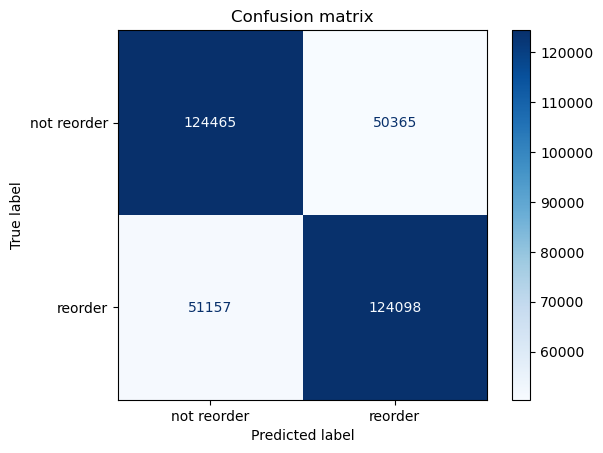

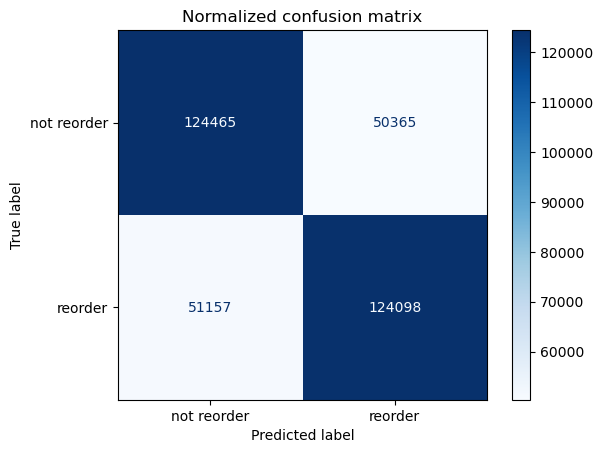

GaussianNB
****Results****
Accuracy: 69.0535%
Precision: 67.0589%
Recall: 69.8998%
F1 Score: 68.4499%
Log Loss: 0.6782
Confusion matrix
[[124222  50608]
 [ 57731 117524]]
Normalized confusion matrix
[[124222  50608]
 [ 57731 117524]]


<Figure size 640x480 with 0 Axes>

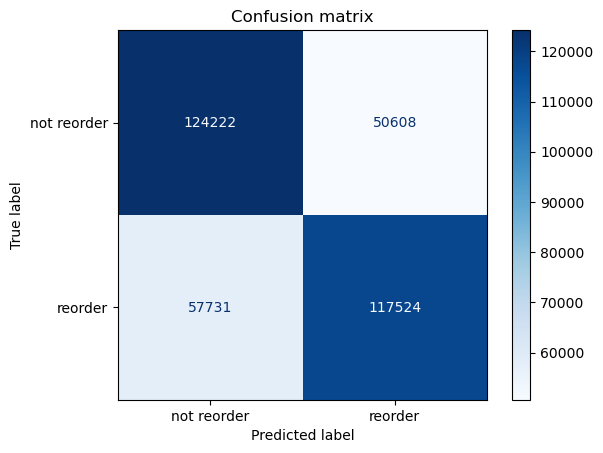

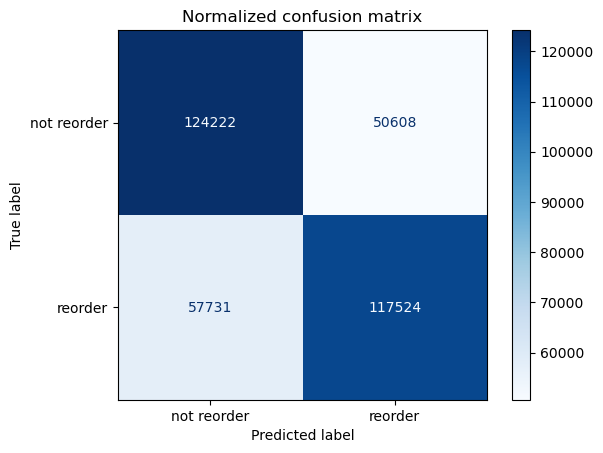

,Classifier,Accuracy,Precision,Recall,F1Score,Log Loss
0,LogisticRegression,70.052,66.752,71.524,69.056,0.573
0,KNeighborsClassifier,94.476,100.000,90.062,94.771,1.069
0,DecisionTreeClassifier,96.996,100.000,94.338,97.087,1.038
0,RandomForestClassifier,99.608,100.000,99.223,99.610,0.048
0,AdaBoostClassifier,70.523,70.958,70.396,70.676,0.687
0,GradientBoostingClassifier,71.001,70.810,71.131,70.970,0.562
0,GaussianNB,69.054,67.059,69.900,68.450,0.678


In [122]:
train(X_train, y_train,X_test,y_test)

## UnderSampling

In [123]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(data_train.drop('reordered', axis=1),data_train.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.2, random_state=42)

In [124]:
target_count = y_over.value_counts()
target_count

0.0    50205
1.0    50205
Name: reordered, dtype: int64

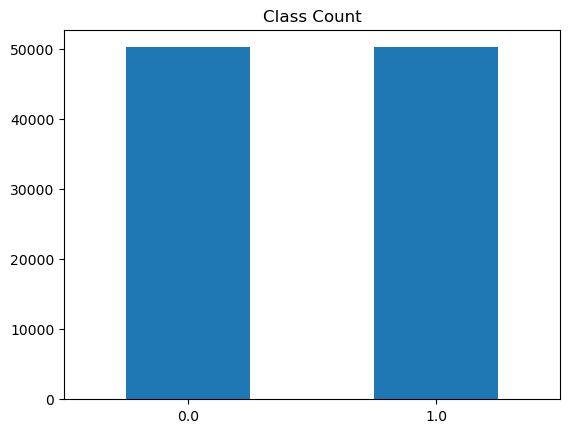

In [125]:
target_count.plot(kind='bar', title='Class Count', rot=0);

LogisticRegression
****Results****
Accuracy: 70.7051%
Precision: 68.0448%
Recall: 71.3168%
F1 Score: 69.6424%
Log Loss: 0.5667
Confusion matrix
[[7451 2714]
 [3169 6748]]
Normalized confusion matrix
[[7451 2714]
 [3169 6748]]


<Figure size 640x480 with 0 Axes>

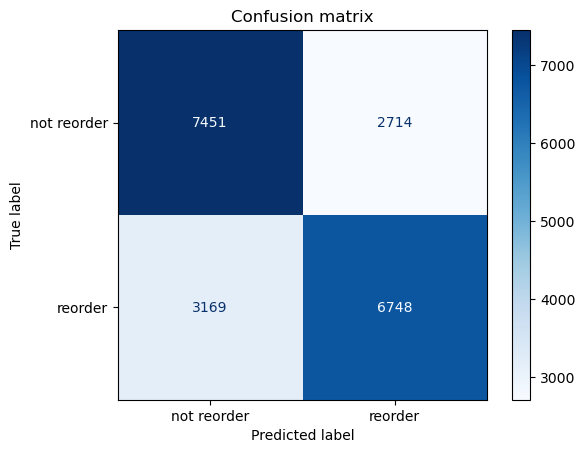

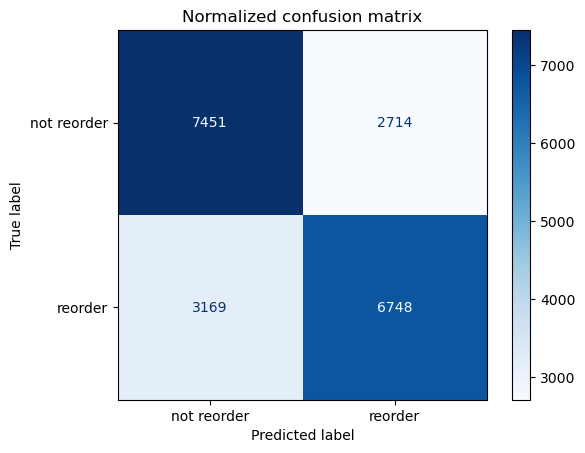

KNeighborsClassifier
****Results****
Accuracy: 64.8939%
Precision: 65.3020%
Recall: 64.2142%
F1 Score: 64.7535%
Log Loss: 4.17
Confusion matrix
[[6556 3609]
 [3441 6476]]
Normalized confusion matrix
[[6556 3609]
 [3441 6476]]


<Figure size 640x480 with 0 Axes>

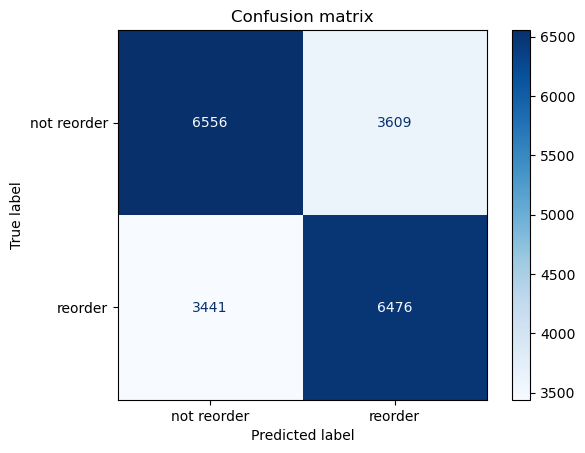

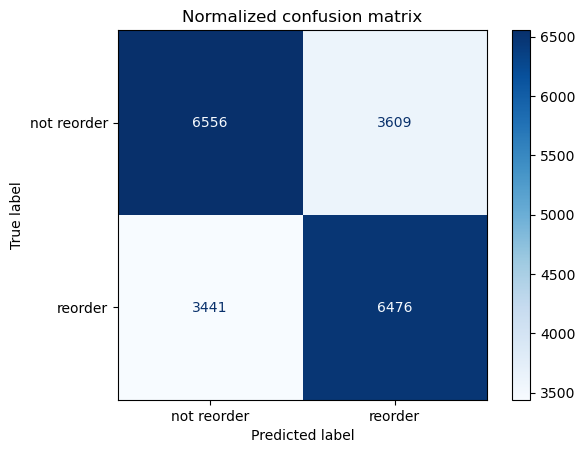

DecisionTreeClassifier
****Results****
Accuracy: 61.9610%
Precision: 62.5693%
Recall: 61.2416%
F1 Score: 61.8983%
Log Loss: 13.14
Confusion matrix
[[6238 3927]
 [3712 6205]]
Normalized confusion matrix
[[6238 3927]
 [3712 6205]]


<Figure size 640x480 with 0 Axes>

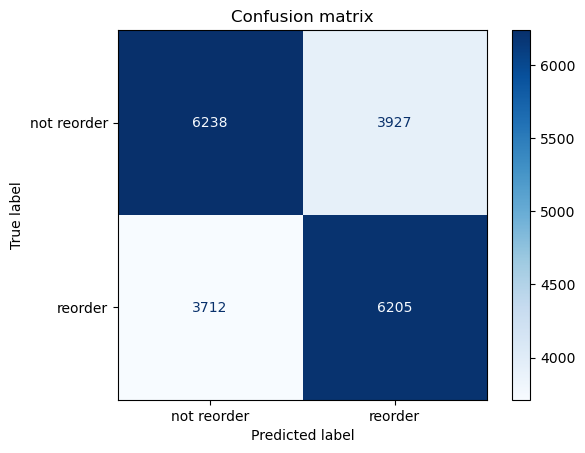

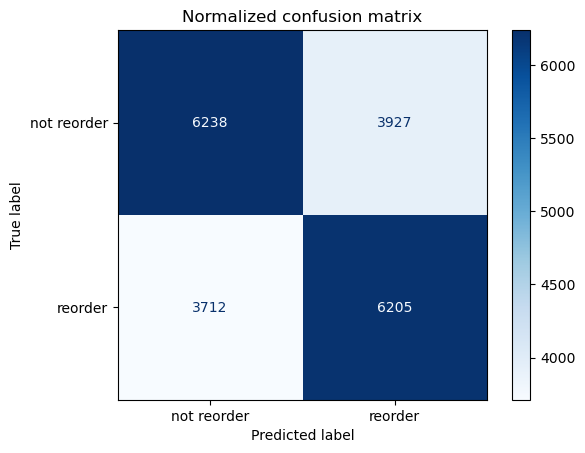

RandomForestClassifier
****Results****
Accuracy: 70.2868%
Precision: 69.8094%
Recall: 69.9576%
F1 Score: 69.8834%
Log Loss: 0.5723
Confusion matrix
[[7192 2973]
 [2994 6923]]
Normalized confusion matrix
[[7192 2973]
 [2994 6923]]


<Figure size 640x480 with 0 Axes>

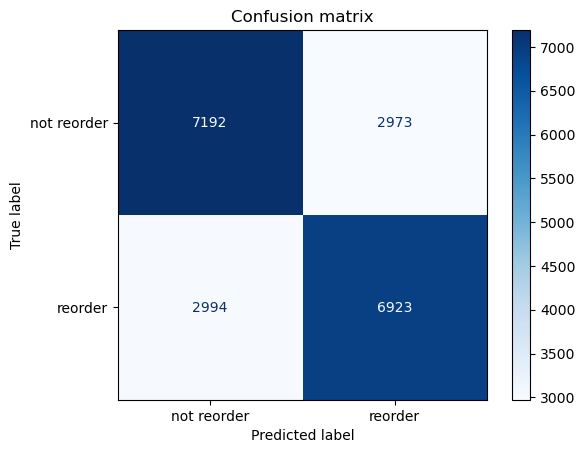

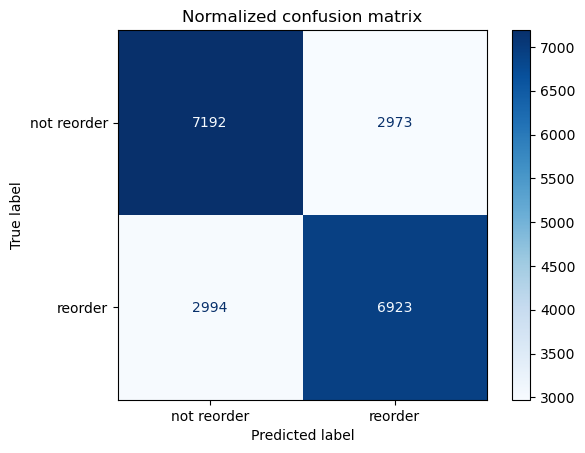

AdaBoostClassifier
****Results****
Accuracy: 70.8993%
Precision: 72.1892%
Recall: 69.8780%
F1 Score: 71.0148%
Log Loss: 0.6874
Confusion matrix
[[7079 3086]
 [2758 7159]]
Normalized confusion matrix
[[7079 3086]
 [2758 7159]]


<Figure size 640x480 with 0 Axes>

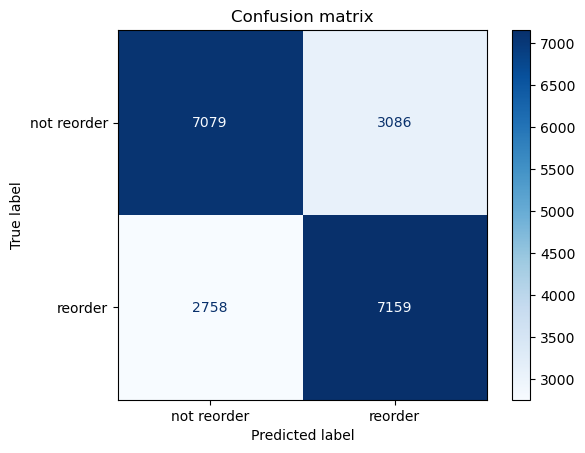

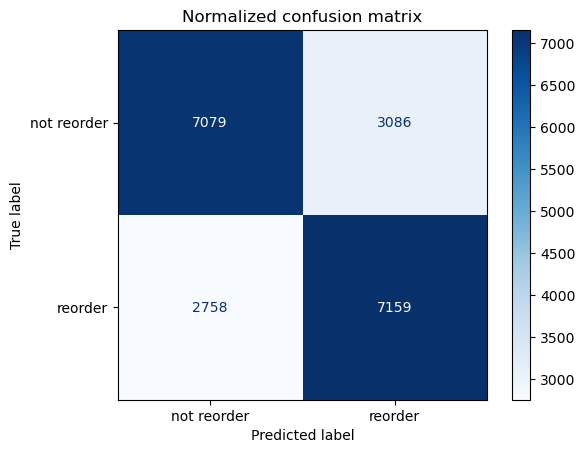

GradientBoostingClassifier
****Results****
Accuracy: 70.8097%
Precision: 70.7371%
Recall: 70.3258%
F1 Score: 70.5309%
Log Loss: 0.5607
Confusion matrix
[[7205 2960]
 [2902 7015]]
Normalized confusion matrix
[[7205 2960]
 [2902 7015]]


<Figure size 640x480 with 0 Axes>

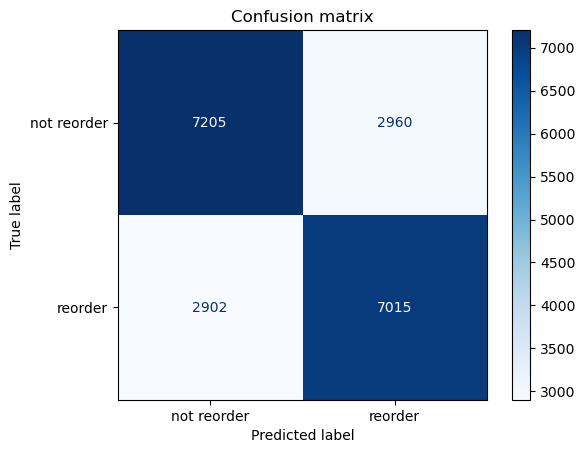

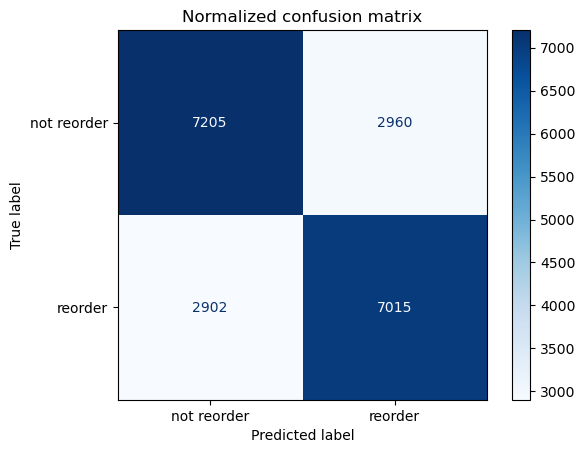

GaussianNB
****Results****
Accuracy: 69.4602%
Precision: 68.1557%
Recall: 69.4370%
F1 Score: 68.7904%
Log Loss: 0.6625
Confusion matrix
[[7190 2975]
 [3158 6759]]
Normalized confusion matrix
[[7190 2975]
 [3158 6759]]


<Figure size 640x480 with 0 Axes>

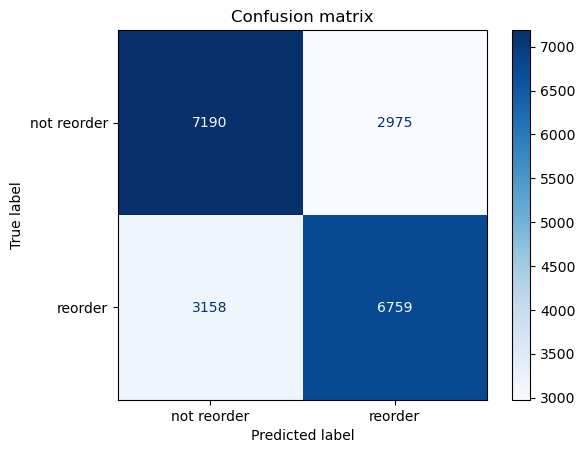

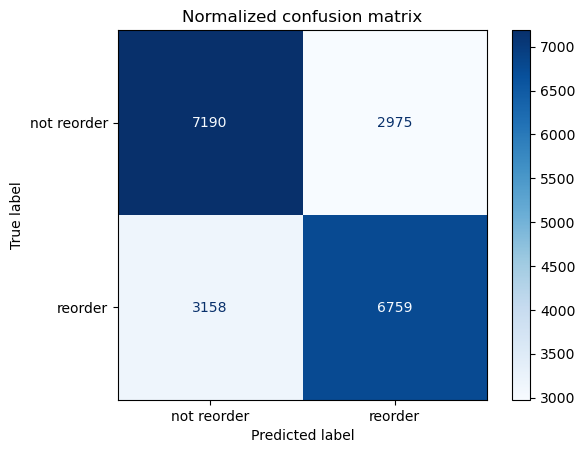

,Classifier,Accuracy,Precision,Recall,F1Score,Log Loss
0,LogisticRegression,70.705,68.045,71.317,69.642,0.567
0,KNeighborsClassifier,64.894,65.302,64.214,64.754,4.170
0,DecisionTreeClassifier,61.961,62.569,61.242,61.898,13.138
0,RandomForestClassifier,70.287,69.809,69.958,69.883,0.572
0,AdaBoostClassifier,70.899,72.189,69.878,71.015,0.687
0,GradientBoostingClassifier,70.810,70.737,70.326,70.531,0.561
0,GaussianNB,69.460,68.156,69.437,68.790,0.662


In [126]:
train(X_train, y_train,X_test,y_test)

## SMOTE

In [127]:
ros = RandomOverSampler(random_state=0)
X_smoted, y_smoted = SMOTE(random_state=42).fit_resample(data_train.drop('reordered', axis=1),data_train.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted,test_size=0.2, random_state=42)

In [128]:
target_count = y_smoted.value_counts()
target_count

0.0    875212
1.0    875212
Name: reordered, dtype: int64

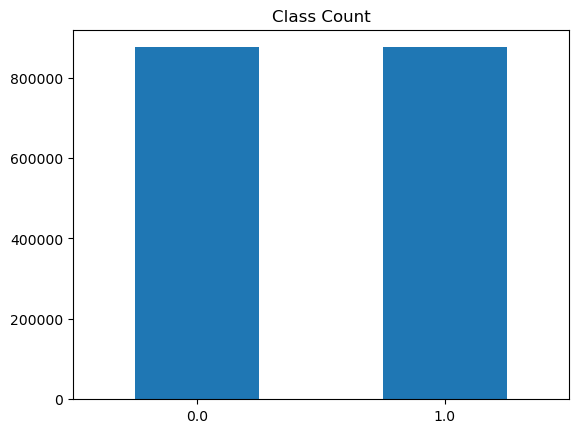

In [129]:
target_count.plot(kind='bar', title='Class Count', rot=0);

LogisticRegression
****Results****
Accuracy: 70.1792%
Precision: 67.1627%
Recall: 71.5299%
F1 Score: 69.2775%
Log Loss: 0.5713
Confusion matrix
[[127981  46849]
 [ 57549 117706]]
Normalized confusion matrix
[[127981  46849]
 [ 57549 117706]]


<Figure size 640x480 with 0 Axes>

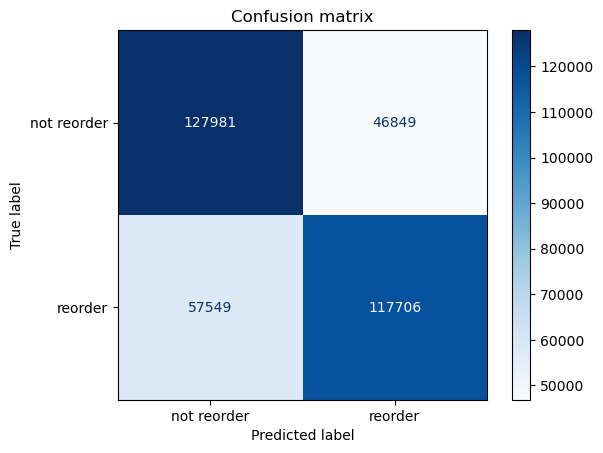

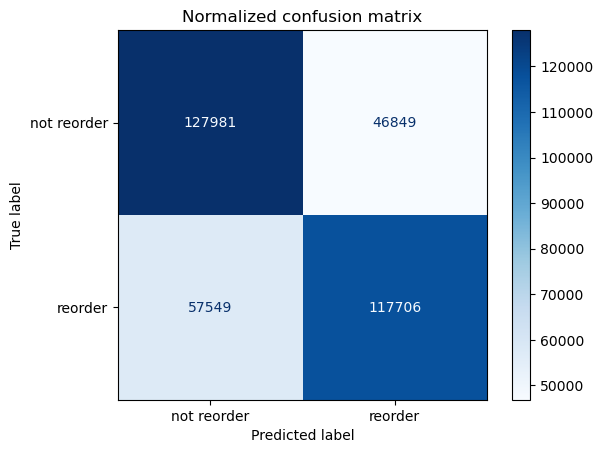

KNeighborsClassifier
****Results****
Accuracy: 90.8408%
Precision: 99.8796%
Recall: 84.6040%
F1 Score: 91.6094%
Log Loss: 1.617
Confusion matrix
[[142976  31854]
 [   211 175044]]
Normalized confusion matrix
[[142976  31854]
 [   211 175044]]


<Figure size 640x480 with 0 Axes>

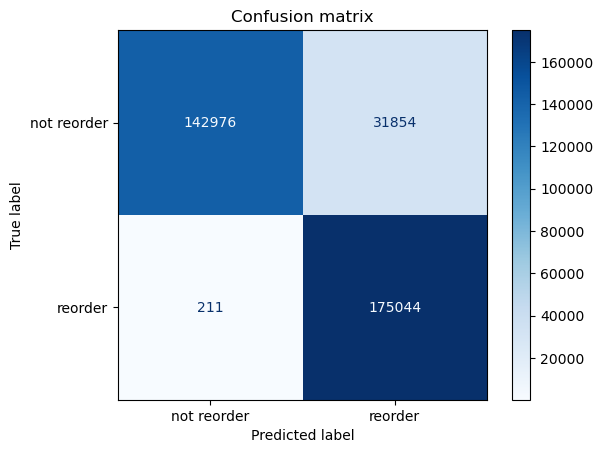

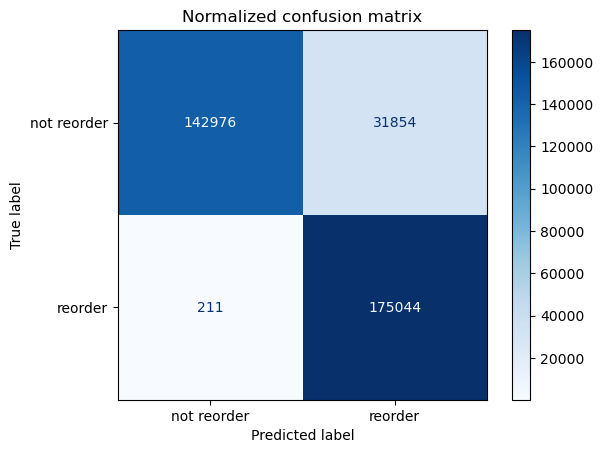

DecisionTreeClassifier
****Results****
Accuracy: 93.4056%
Precision: 94.4515%
Recall: 92.5307%
F1 Score: 93.4813%
Log Loss: 2.278
Confusion matrix
[[161468  13362]
 [  9724 165531]]
Normalized confusion matrix
[[161468  13362]
 [  9724 165531]]


<Figure size 640x480 with 0 Axes>

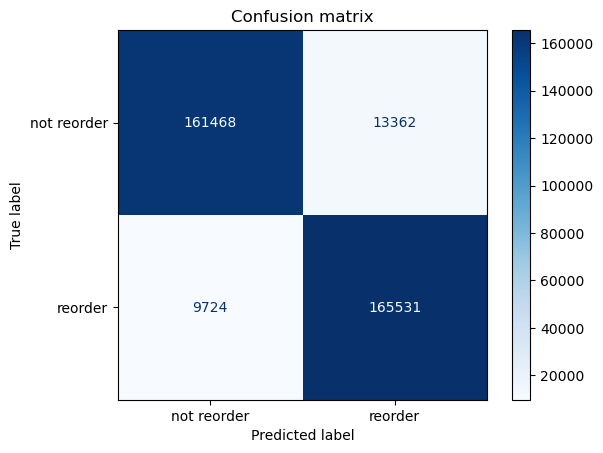

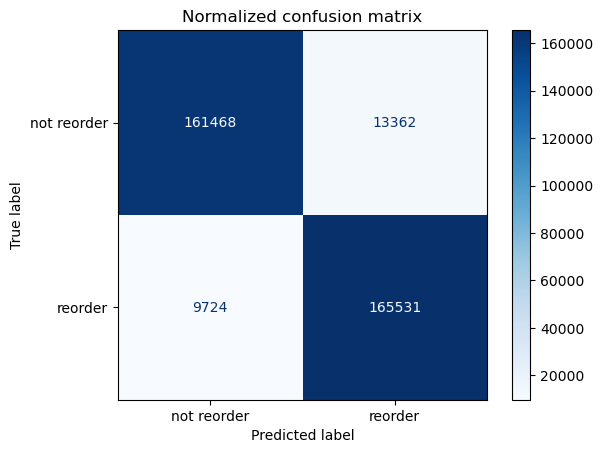

In [ ]:
train(X_train, y_train,X_test,y_test)

# Original features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train_original.drop('reordered', axis=1), data_train_original.reordered,test_size=0.2, random_state=42)
X_train.isnull().values.any()

In [ ]:
target_count = data_train_original.reordered.value_counts()
target_count

In [ ]:
train(X_train, y_train,X_test,y_test)

In [ ]:
#OverSampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data_train_original.drop('reordered', axis=1),data_train_original.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [ ]:
train(X_train, y_train,X_test,y_test)

In [ ]:
#Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(data_train.drop('reordered', axis=1),data_train.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.2, random_state=42)

In [ ]:
train(X_train, y_train,X_test,y_test)

In [ ]:
#SMOTE
ros = RandomOverSampler(random_state=0)
X_smoted, y_smoted = SMOTE(random_state=42).fit_resample(data_train.drop('reordered', axis=1),data_train.reordered)
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted,test_size=0.2, random_state=42)

In [ ]:
train(X_train, y_train,X_test,y_test)